# Homework 6:  Game of Life

Please refer to the homework handout for more information on this assignment, what is provided to you, and what is required of you.  Additional notes throughout this document will help indicate functions that are unimplemented versus functions that are already provided for you.

Make sure to add your name and collaborators.  Feel free to include more text blocks if you'd like to discuss your submission outside of the code blocks.

## Provided Code

Below are some functions you may find helpful in testing your code.  **You do not need to edit the below code.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def create_empty_board(height, width):
  """Create an empty board (numpy array) with `height` rows and `width` columns.

  Inputs:
    height (int):  number of rows for board.
    width (int):  number of columns for board.

  Outputs:
    board (numpy array):  empty board of size height by width, full of zeros.
  """
  return np.zeros((height, width))


def create_random_board(height, width, prob_red, prob_blue):
  """Create a board (numpy array) with `height` rows and `width` columns, where
  roughly `prob_red` fraction of the cells are red and roughly `prob_blue`
  fraction of the cells are blue.  Checks that the total probability of a cell
  to be non-empty is not more than 100%.

  Inputs:
    height (int):  number of rows for board.
    width (int):  number of columns for board.
    prob_red (float):  probability of a cell to be red.
    prob_blue (float):  probability of a cell to be blue.

  Outputs:
    board (numpy array):  board of size height by width, with some cells red
      (denoted by 1s), some cells blue (denoted by 2s), and some cells empty
      (denoted by 0s).
  """
  assert prob_red + prob_blue <= 1

  board = create_empty_board(height, width)
  rand_board = np.random.rand(height, width)

  board[np.where(rand_board < prob_red)] = 1
  board[np.where(rand_board > 1-prob_blue)] = 2

  return board


def visualize_board(board, red_fraction, blue_fraction, iteration):
  """Helper function to create a plot of the board.  It renders 0s in `board` as
  white, 1s as red, and 2s as blue.  It also draws markers on any cells that are
  unhappy.

  Inputs:
    board (numpy array):  game board.
    red_fraction (float, from 0.0 to 1.0):  the fraction of red neighbors a red
      cell requires to be happy.
    blue_fraction (float, from 0.0 to 1.0):  the fraction of blue neighbors a
      blue cell requires to be happy.
    iteration (int):  the iteration number for solving the board, for
      rendering it in the title of the plot.

  Outputs:
    Does not return anything but creates and renders a new matplotlib plot.
  """
  plt.figure()
  colored_board = np.tile(np.expand_dims(np.ones_like(board), axis=0), (3, 1, 1))
  colored_board[:][np.tile(board==1, (3, 1, 1))] = np.repeat(np.array([1, 0, 0]), np.sum(board==1))
  colored_board[:][np.tile(board==2, (3, 1, 1))] = np.repeat(np.array([0, 0, 1]), np.sum(board==2))
  colored_board = np.transpose(colored_board, (1, 2, 0)).astype('float32')
  plt.imshow(colored_board)

  title = f'Board, Red Fraction {red_fraction}, Blue Fraction {blue_fraction}, Iteration {iteration}'
  plt.title(title)

  # Plot a yellow 'X' on all the unhappy cells, as determined by your function.
  happiness_map = board_cells_are_happy(board, red_fraction, blue_fraction)

  board_size = len(board)
  marker_size = 500*25/(board_size**2)

  unhappy_rows, unhappy_cols = np.where(happiness_map == False)
  for row, col in zip(unhappy_rows, unhappy_cols):
    plt.scatter(col, row, marker='X', s=marker_size, color='yellow')

# Code for Students to Implement

The following four functions are defined in their function headers but do not contain functional code that obeys the rules of the modified Game of Life game.  **It is your job to fill in these functions!**  In doing so, you are welcome to define more functions than just these four to act as helpers.

In [ ]:
def board_cells_are_happy(board, red_fraction, blue_fraction):
  """PART OF ASSIGNMENT TO COMPLETE THIS FUNCTION!

  Returns a map of the board where each cell is marked as happy (boolean True)
  or unhappy (boolean False).

  Inputs:
    board (numpy array):  game board.
    red_fraction (float, from 0.0 to 1.0):  the fraction of red neighbors a red
      cell requires to be happy.
    blue_fraction (float, from 0.0 to 1.0):  the fraction of blue neighbors a
      blue cell requires to be happy.
  Outputs:
    happy_map (numpy array, bool-valued):   an array matching the size of the
      game board, where True-valued cells indicate happy or empty cells, and
      False-valued cells indicate occupied unhappy cells.
  """
  #happy_map = np.zeros_like(board, dtype=bool)   # starts with all locations
                                                 # marked as unhappy (False).

  # INSERT STUDENT CODE HERE:
  """Some suggestions:
   - Make sure to properly handle cells that are on the edges of the board.
   - Make sure to determine if red cells are happy based on `red_fraction`, and
     same with blue cells with `blue_fraction`.
   - Remember empty cells should be considered "happy" and thus have True at
     those locations.
   - You can (and may want to) initialize `happy_map` with True values
     everywhere instead of False.
  """
  #here i am going to make a border of zeros so that i can evaluate every emement in the same way
  #first making it with zeros
  boardwzer=np.zeros((board.shape[0] + 2 , board.shape[1] + 2), dtype=board.dtype)
  #then putting the board array in the middle of it
  boardwzer[1:1+board.shape[0], 1:1+board.shape[1]] = board
  #this is intiating a array of bolians of the same size as the thing with borders
  happy_map = np.ones_like(boardwzer, dtype=bool)
  #now we need to iterate though every element
  for row in range(boardwzer.shape[0]):
      for col in range(boardwzer.shape[1]):
        #now we take each element and check if it is red of blue
          element = int(boardwzer[row, col])
          if element ==1:
            #red cells
            #starts with negative one as we will pass over the one we are testing
            red_count=-1
            blue_count=0
            #this iterates through the 3 by 3 square
            for inrow in range(row-1,row+1):
              for incol in range(col-1,col+1):
                #takes eache value and tests if it is red of blue then adds to the counter
                element_test = boardwzer[inrow, incol]
                if element_test==1:
                  red_count=red_count+1
                elif element_test==2:
                  blue_count=blue_count+1
            if (red_count/(blue_count+red_count+0.0001)) >= red_fraction:
              happy_map[row,col]=True
            else:
              happy_map[row,col]=False
          elif element==2:
          #blue cells
          #starts with negative 1 for blue as we iterate over our own work
            red_count=0
            blue_count=-1
            #now we test that 3 by 3 square and add to each of the counters
            for inrow in range(row-1,row+1):
              for incol in range(col-1,col+1):
                element_test = int(boardwzer[inrow,incol])
                if element_test ==1:
                  red_count+=1
                elif element_test==2:
                  blue_count+=1
                  # this checks the proportion if blue counters over the overall counters and compares it to the ratio and places a true or falce in its stead
            if (blue_count/(blue_count+red_count+0.0001))>= blue_fraction:
              happy_map[row,col]=True
            else:
              happy_map[row,col]=False
              #this line resizes the array so that it is in the samne dimention as the original board
  happy_resized=happy_map[1:(boardwzer.shape[0]-1),1:(boardwzer.shape[1]-1)]

  # then we return the rezies matrix of bollean values of which are happy and unhappy
  return happy_resized   # `happy_map` should be updated in student code
def check_fractions(board, row, col, red_fraction, blue_fraction):
  '''
  checks for other spots where the if the item wold move to it then the fraction of like neighbours would increas.
  if there are no happy places for it to move to.

  Inputs:
    board (numpy array):  game board.
    row (int):  the row of the cell of interest.
    col (int):  the column of the cell of interest.
    red_fraction (float, from 0.0 to 1.0):  the fraction of red neighbors a red
      cell requires to be happy.
    blue_fraction (float, from 0.0 to 1.0):  the fraction of blue neighbors a
      blue cell requires to be happy.

  Ouputs:
    new_row (int):  the row of the suggested new location for the cell to move.
    new_col (int):  the column of the suggested new location for the cell to
      move.
  '''
  #here i am mackng and intial test fraction which is small so that i can comapare the other fractions to it
  testfraction=0
  element= board[row, col]
  #here if the item is red it itterates thrugh and finds all the zeros
  if element==1:
    for row_empt in range(board.shape[0]):
      for col_empt in range(board.shape[1]):
        #we need to make one we are testing 0 so that we dont count it twice
        board[row, col]=0
        if board[row_empt,col_empt]==0:
          #here we have specific edge cases for every different possible postiion where we caont simply do a 3 by 3 cube
          red_count=-1
          blue_count=0
          if row==0:
            if col==0:
              #top left corner
              for inrow in range(0,1):
                for incol in range(0,1):
                  element_test = board[inrow, incol]
                  if element_test ==1:
                    red_count+=1
                  elif element_test==2:
                    blue_count+=1
                    #here if the fraction is greater than the best one found beorre this is done for all others
              if (red_count/(blue_count+red_count+0.000001)) > testfraction:
                good_row=row_empt
                good_col=col_empt
                testfraction=(red_count/(blue_count+red_count))
            elif col==board.shape[1]:
            #top right
              for inrow in range(0,1):
                for incol in range(board.shape[1]-1,board.shape[1]):
                  element_test = board[inrow, incol]
                  if element_test ==1:
                    red_count+=1
                  elif element_test==2:
                    blue_count+=1
              if (red_count/(blue_count+red_count+0.000001)) > testfraction:
                good_row=row_empt
                good_col=col_empt
                testfraction=(red_count/(blue_count+red_count))
            else:
              #top row
              for inrow in range(0,1):
                for incol in range(col-1,col+1):
                  element_test = board[inrow, incol]
                  if element_test ==1:
                    red_count+=1
                  elif element_test==2:
                    blue_count+=1
              if (red_count/(blue_count+red_count+0.000001)) > testfraction:
                good_row=row_empt
                good_col=col_empt
                testfraction=(red_count/(blue_count+red_count))
          elif row ==board.shape[0]:
            if col==0:
            #botom left
              for inrow in range(board.shape[0]-1,board.shape[0]):
                for incol in range(0,1):
                  element_test = board[inrow, incol]
                  if element_test ==1:
                    red_count+=1
                  elif element_test==2:
                    blue_count+=1
              if (red_count/(blue_count+red_count+0.000001)) > testfraction:
                good_row=row_empt
                good_col=col_empt
                testfraction=(red_count/(blue_count+red_count))
            elif col==board.shape[1]:
              #botom right corner
              for inrow in range(board.shape[0]-1,board.shape[0]):
                for incol in range(board.shape[1]-1,board.shape[1]):
                  element_test = board[inrow, incol]
                  if element_test ==1:
                    red_count+=1
                  elif element_test==2:
                    blue_count+=1
              if (red_count/(blue_count+red_count+0.000001)) > testfraction:
                good_row=row_empt
                good_col=col_empt
                testfraction=(red_count/(blue_count+red_count))
            else:
              #bottom row
              for inrow in range(board.shape[0]-1,board.shape[0]):
                for incol in range(col-1,col+1):
                  element_test = board[inrow, incol]
                  if element_test ==1:
                    red_count+=1
                  elif element_test==2:
                    blue_count+=1
              if (red_count/(blue_count+red_count+0.000001)) > testfraction:
                good_row=row_empt
                good_col=col_empt
                testfraction=(red_count/(blue_count+red_count))
          elif col==0:
            #LEFT COLOUM
            for inrow in range(row-1,row+1):
                for incol in range(0,1):
                  element_test = board[inrow, incol]
                  if element_test ==1:
                    red_count+=1
                  elif element_test==2:
                    blue_count+=1
            if (red_count/(blue_count+red_count+0.000001)) > testfraction:
                good_row=row_empt
                good_col=col_empt
                testfraction=(red_count/(blue_count+red_count))
          elif col==board.shape[1]:
            #'RIGHT COLOUM
            for inrow in range(row-1,row+1):
                for incol in range(board.shape[1]-1,board.shape[1]):
                  element_test = board[inrow, incol]
                  if element_test ==1:
                    red_count+=1
                  elif element_test==2:
                    blue_count+=1
            if (red_count/(blue_count+red_count+0.000001)) > testfraction:
                good_row=row_empt
                good_col=col_empt
                testfraction=(red_count/(blue_count+red_count))
          else:
            #for all the middle ones
            for inrow in range(row-1,row+1):
              for incol in range(col-1,col+1):
                element_test = board[inrow, incol]
                if element_test ==1:
                  red_count+=1
                elif element_test==2:
                  blue_count+=1
            if (red_count/(blue_count+red_count+0.000001)) > testfraction:
              good_row=row_empt
              good_col=col_empt
              testfraction=(red_count/(blue_count+red_count))
              #here we are resinstating the original vlaue of the elemtsnty
    board[row, col]=1
    #this is for if the elemtent is blue
  elif element==2:
    #itterate thourhg every empty one
    for row_empt in range(board.shape[0]):
      for col_empt in range(board.shape[1]):
        if board[row_empt,col_empt]==0:
          #make it 0 so that we dont count it twice
          board[row, col]=0
          red_count=0
          blue_count=-1
          #now we deal with all the edge casses
          if row==0:
            if col==0:
              #top left corner
              for inrow in range(0,1):
                for incol in range(0,1):
                  element_test = board[inrow, incol]
                  if element_test ==1:
                    red_count+=1
                  elif element_test==2:
                    blue_count+=1
              if (blue_count/(blue_count+red_count+0.000001)) > testfraction:
                good_row=row_empt
                good_col=col_empt
                testfraction=(blue_count/(blue_count+red_count))
            elif col==board.shape[1]:
            #top right
              for inrow in range(0,1):
                for incol in range(board.shape[1]-1,board.shape[1]):
                  element_test = board[inrow, incol]
                  if element_test ==1:
                    red_count+=1
                  elif element_test==2:
                    blue_count+=1
              if (blue_count/(blue_count+red_count+0.000001)) > testfraction:
                good_row=row_empt
                good_col=col_empt
                testfraction=(blue_count/(blue_count+red_count))
            else:
              #top row
              for inrow in range(0,1):
                for incol in range(col-1,col+1):
                  element_test = board[inrow, incol]
                  if element_test ==1:
                    red_count+=1
                  elif element_test==2:
                    blue_count+=1
              if (blue_count/(blue_count+red_count+0.000001)) > testfraction:
                good_row=row_empt
                good_col=col_empt
                testfraction=(blue_count/(blue_count+red_count))
          elif row ==board.shape[0]:
            if col==0:
            #botom left
              for inrow in range(board.shape[0]-1,board.shape[0]):
                for incol in range(0,1):
                  element_test = board[inrow, incol]
                  if element_test ==1:
                    red_count+=1
                  elif element_test==2:
                    blue_count+=1
              if (blue_count/(blue_count+red_count+0.000001)) > testfraction:
                good_row=row_empt
                good_col=col_empt
                testfraction=(blue_count/(blue_count+red_count))
            elif col==board.shape[1]:
              #botom right corner
              for inrow in range(board.shape[0]-1,board.shape[0]):
                for incol in range(board.shape[1]-1,board.shape[1]):
                  element_test = board[inrow, incol]
                  if element_test ==1:
                    red_count+=1
                  elif element_test==2:
                    blue_count+=1
              if (blue_count/(blue_count+red_count+0.000001)) > testfraction:
                good_row=row_empt
                good_col=col_empt
                testfraction=(blue_count/(blue_count+red_count))
            else:
              #bottom row
              for inrow in range(board.shape[0]-1,board.shape[0]):
                for incol in range(col-1,col+1):
                  element_test = board[inrow, incol]
                  if element_test ==1:
                    red_count+=1
                  elif element_test==2:
                    blue_count+=1
              if (blue_count/(blue_count+red_count+0.000001)) > testfraction:
                good_row=row_empt
                good_col=col_empt
                testfraction=(blue_count/(blue_count+red_count))
          elif col==0:
            #LEFT COLOUM
            for inrow in range(row-1,row+1):
                for incol in range(0,1):
                  element_test = board[inrow, incol]
                  if element_test ==1:
                    red_count+=1
                  elif element_test==2:
                    blue_count+=1
            if (blue_count/(blue_count+red_count+0.000001)) > testfraction:
                good_row=row_empt
                good_col=col_empt
                testfraction=(blue_count/(blue_count+red_count))
          elif col==board.shape[1]:
            #'RIGHT COLOUM
            for inrow in range(row-1,row+1):
                for incol in range(board.shape[1]-1,board.shape[1]):
                  element_test = board[inrow, incol]
                  if element_test ==1:
                    red_count+=1
                  elif element_test==2:
                    blue_count+=1
            if (blue_count/(blue_count+red_count+0.000001)) > testfraction:
                good_row=row_empt
                good_col=col_empt
                testfraction=(blue_count/(blue_count+red_count))
          else:
            #for everything in the middle
            for inrow in range(row-1,row+1):
              for incol in range(col-1,col+1):
                element_test = board[inrow, incol]
                if element_test ==1:
                  red_count+=1
                elif element_test==2:
                  blue_count+=1
            if (blue_count/(blue_count+red_count+0.000001)) > testfraction:
              good_row=row_empt
              good_col=col_empt
              testfraction=(blue_count/(blue_count+red_count))
              #now we revert it back to blue
    board[row, col]=2
    #them out comes our suggestion
  return (good_row,good_col)
def closest_best_place_to_move(board, row, col, red_fraction, blue_fraction):
  """PART OF ASSIGNMENT TO COMPLETE THIS FUNCTION!

  Suggests a better location for the queried cell to move.  This is done by:
    1) First trying to find a happy location (finding the closest happy location
       available if multiple, choosing at random among tied closest options).
    2) Second trying to find an available cell with a higher percentage of like
       neighbors than where the cell is currently located (choosing at random
       among tied options if multiple).  If
       the set of cells with highest percentage of like neighbors includes the
       current cell, it will not be moved.
    3) Lastly not moving the cell at all, if the set of cells with highest
       percentage of like neighbors includes the current cell.
    This function also checks to make sure the cell that's requested to be moved
    actually is occupied.

  Inputs:
    board (numpy array):  game board.
    row (int):  the row of the cell of interest.
    col (int):  the column of the cell of interest.
    red_fraction (float, from 0.0 to 1.0):  the fraction of red neighbors a red
      cell requires to be happy.
    blue_fraction (float, from 0.0 to 1.0):  the fraction of blue neighbors a
      blue cell requires to be happy.

  Ouputs:
    new_row (int):  the row of the suggested new location for the cell to move.
    new_col (int):  the column of the suggested new location for the cell to
      move.
  """
  assert board[row, col] != 0
  good_row = row      # should be updated in student code
  good_col = col
  dist=100000000000000
  # INSERT STUDENT CODE HERE:
  #here we take out an element from the board
  element= board[row, col]
  #check if it is red or blue
  if element==1:
    #itterate trough adn find the empty ones
    for row_empt in range(board.shape[0]):
      for col_empt in range(board.shape[1]):
        if board[row_empt,col_empt]==0:
          #we set our red counter down one so that we go back to neutral as we are sure to pass over ourselves
          red_count=-1
          blue_count=0
          if row==0:
            if col==0:
              #top left corner
              #this is the same counting prococall as all the other ones
              # i adcjused the range of the loops so that it dosent go over the edges for all of them
              for inrow in range(0,1):
                for incol in range(0,1):
                  element_test = board[inrow, incol]
                  if element_test ==1:
                    red_count+=1
                  elif element_test==2:
                    blue_count+=1
              if (red_count/(blue_count+red_count+0.000001)) >= red_fraction:#here i check if the cell is happy
                dist_test=abs(row-row_empt)-abs(col-col_empt)
                if dist_test<dist:
                  good_row=row_empt
                  good_col=col_empt
                  dist=dist_test
                else:
                  check_fractions(board, row, col, red_fraction, blue_fraction)
            elif col==board.shape[1]:
            #top right
              for inrow in range(0,1):
                for incol in range(board.shape[1]-1,board.shape[1]):
                  element_test = board[inrow, incol]
                  if element_test ==1:
                    red_count+=1
                  elif element_test==2:
                    blue_count+=1
              if (red_count/(blue_count+red_count+0.000001)) >= red_fraction:
                dist_test=abs(row-row_empt)-abs(col-col_empt)
                if dist_test<dist:
                  good_row=row_empt
                  good_col=col_empt
                  dist=dist_test
                else:
                  check_fractions(board, row, col, red_fraction, blue_fraction)
            else:
              #top row
              for inrow in range(0,1):
                for incol in range(col-1,col+1):
                  element_test = board[inrow, incol]
                  if element_test ==1:
                    red_count+=1
                  elif element_test==2:
                    blue_count+=1
              if (red_count/(blue_count+red_count+0.000001)) >= red_fraction:
                dist_test=abs(row-row_empt)-abs(col-col_empt)
                if dist_test<dist:
                  good_row=row_empt
                  good_col=col_empt
                  dist=dist_test
                else:
                  check_fractions(board, row, col, red_fraction, blue_fraction)
          elif row ==board.shape[0]:
            if col==0:
            #botom left
              for inrow in range(board.shape[0]-1,board.shape[0]):
                for incol in range(0,1):
                  element_test = board[inrow, incol]
                  if element_test ==1:
                    red_count+=1
                  elif element_test==2:
                    blue_count+=1
              if (red_count/(blue_count+red_count+0.000001)) >= red_fraction:
                dist_test=abs(row-row_empt)-abs(col-col_empt)
                if dist_test<dist:
                  good_row=row_empt
                  good_col=col_empt
                  dist=dist_test
                else:
                  check_fractions(board, row, col, red_fraction, blue_fraction)
            elif col==board.shape[1]:
              #botom right corner
              for inrow in range(board.shape[0]-1,board.shape[0]):
                for incol in range(board.shape[1]-1,board.shape[1]):
                  element_test = board[inrow, incol]
                  if element_test ==1:
                    red_count+=1
                  elif element_test==2:
                    blue_count+=1
              if (red_count/(blue_count+red_count+0.000001)) >= red_fraction:
                dist_test=abs(row-row_empt)-abs(col-col_empt)
                if dist_test<dist:
                  good_row=row_empt
                  good_col=col_empt
                  dist=dist_test
                else:
                  check_fractions(board, row, col, red_fraction, blue_fraction)
            else:
              #bottom row
              for inrow in range(board.shape[0]-1,board.shape[0]):
                for incol in range(col-1,col+1):
                  element_test = board[inrow, incol]
                  if element_test ==1:
                    red_count+=1
                  elif element_test==2:
                    blue_count+=1
              if (red_count/(blue_count+red_count+0.000001)) >= red_fraction:
                dist_test=abs(row-row_empt)-abs(col-col_empt)
                if dist_test<dist:
                  good_row=row_empt
                  good_col=col_empt
                  dist=dist_test
                else:
                  check_fractions(board, row, col, red_fraction, blue_fraction)
          elif col==0:
            #LEFT COLOUM
            for inrow in range(row-1,row+1):
                for incol in range(0,1):
                  element_test = board[inrow, incol]
                  if element_test ==1:
                    red_count+=1
                  elif element_test==2:
                    blue_count+=1
            if (red_count/(blue_count+red_count+0.000001)) >= red_fraction:
                dist_test=abs(row-row_empt)-abs(col-col_empt)
                if dist_test<dist:
                  good_row=row_empt
                  good_col=col_empt
                  dist=dist_test
                else:
                  check_fractions(board, row, col, red_fraction, blue_fraction)
          elif col==board.shape[1]:
            #'RIGHT COLOUM
            for inrow in range(row-1,row+1):
                for incol in range(board.shape[1]-1,board.shape[1]):
                  element_test = board[inrow, incol]
                  if element_test ==1:
                    red_count+=1
                  elif element_test==2:
                    blue_count+=1
            if (red_count/(blue_count+red_count+0.000001)) >= red_fraction:
                dist_test=abs(row-row_empt)-abs(col-col_empt)
                if dist_test<dist:
                  good_row=row_empt
                  good_col=col_empt
                  dist=dist_test
                else:
                  check_fractions(board, row, col, red_fraction, blue_fraction)
          else:
            for inrow in range(row-1,row+1):
              for incol in range(col-1,col+1):
                element_test = board[inrow, incol]
                if element_test ==1:
                  red_count+=1
                elif element_test==2:
                  blue_count+=1
            if (red_count/(blue_count+red_count+0.000001)) >= red_fraction:
                dist_test=abs(row-row_empt)-abs(col-col_empt)
                if dist_test<dist:
                  good_row=row_empt
                  good_col=col_empt
                  dist=dist_test
                else:
                  check_fractions(board, row, col, red_fraction, blue_fraction)

  elif element==2:
    for row_empt in range(board.shape[0]):
      for col_empt in range(board.shape[1]):
        if board[row_empt,col_empt]==0:
          red_count=0
          blue_count=-1
          if row==0:
            if col==0:
              #top left corner
              for inrow in range(0,1):
                for incol in range(0,1):
                  element_test = board[inrow, incol]
                  if element_test ==1:
                    red_count+=1
                  elif element_test==2:
                    blue_count+=1
              if (blue_count/(blue_count+red_count+0.000001)) >= blue_fraction:
                dist_test=abs(row-row_empt)-abs(col-col_empt)
                if dist_test<dist:
                  good_row=row_empt
                  good_col=col_empt
                  dist=dist_test
                else:
                  check_fractions(board, row, col, red_fraction, blue_fraction)
            elif col==board.shape[1]:
            #top right
              for inrow in range(0,1):
                for incol in range(board.shape[1]-1,board.shape[1]):
                  element_test = board[inrow, incol]
                  if element_test ==1:
                    red_count+=1
                  elif element_test==2:
                    blue_count+=1
              if (blue_count/(blue_count+red_count+0.000001)) >= blue_fraction:
                dist_test=abs(row-row_empt)-abs(col-col_empt)
                if dist_test<dist:
                  good_row=row_empt
                  good_col=col_empt
                  dist=dist_test
                else:
                  check_fractions(board, row, col, red_fraction, blue_fraction)
            else:
              #top row
              for inrow in range(0,1):
                for incol in range(col-1,col+1):
                  element_test = board[inrow, incol]
                  if element_test ==1:
                    red_count+=1
                  elif element_test==2:
                    blue_count+=1
              if (blue_count/(blue_count+red_count+0.000001)) >= blue_fraction:
                dist_test=abs(row-row_empt)-abs(col-col_empt)
                if dist_test<dist:
                  good_row=row_empt
                  good_col=col_empt
                  dist=dist_test
                else:
                  check_fractions(board, row, col, red_fraction, blue_fraction)
          elif row ==board.shape[0]:
            if col==0:
            #botom left
              for inrow in range(board.shape[0]-1,board.shape[0]):
                for incol in range(0,1):
                  element_test = board[inrow, incol]
                  if element_test ==1:
                    red_count+=1
                  elif element_test==2:
                    blue_count+=1
              if (blue_count/(blue_count+red_count+0.000001)) >= blue_fraction:
                dist_test=abs(row-row_empt)-abs(col-col_empt)
                if dist_test<dist:
                  good_row=row_empt
                  good_col=col_empt
                  dist=dist_test
                else:
                  check_fractions(board, row, col, red_fraction, blue_fraction)
            elif col==board.shape[1]:
              #botom right corner
              for inrow in range(board.shape[0]-1,board.shape[0]):
                for incol in range(board.shape[1]-1,board.shape[1]):
                  element_test = board[inrow, incol]
                  if element_test ==1:
                    red_count+=1
                  elif element_test==2:
                    blue_count+=1
              if (blue_count/(blue_count+red_count+0.000001)) >= blue_fraction:
                dist_test=abs(row-row_empt)-abs(col-col_empt)
                if dist_test<dist:
                  good_row=row_empt
                  good_col=col_empt
                  dist=dist_test
                else:
                  check_fractions(board, row, col, red_fraction, blue_fraction)
            else:
              #bottom row
              for inrow in range(board.shape[0]-1,board.shape[0]):
                for incol in range(col-1,col+1):
                  element_test = board[inrow, incol]
                  if element_test ==1:
                    red_count+=1
                  elif element_test==2:
                    blue_count+=1
              if (blue_count/(blue_count+red_count+0.000001)) >= blue_fraction:
                dist_test=abs(row-row_empt)-abs(col-col_empt)
                if dist_test<dist:
                  good_row=row_empt
                  good_col=col_empt
                  dist=dist_test
                else:
                  check_fractions(board, row, col, red_fraction, blue_fraction)
          elif col==0:
            #LEFT COLOUM
            for inrow in range(row-1,row+1):
                for incol in range(0,1):
                  element_test = board[inrow, incol]
                  if element_test ==1:
                    red_count+=1
                  elif element_test==2:
                    blue_count+=1
            if (blue_count/(blue_count+red_count+0.000001)) >= blue_fraction:
                dist_test=abs(row-row_empt)-abs(col-col_empt)
                if dist_test<dist:
                  good_row=row_empt
                  good_col=col_empt
                  dist=dist_test
                else:
                  check_fractions(board, row, col, red_fraction, blue_fraction)
          elif col==board.shape[1]:
            #'RIGHT COLOUM
            for inrow in range(row-1,row+1):
                for incol in range(board.shape[1]-1,board.shape[1]):
                  element_test = board[inrow, incol]
                  if element_test ==1:
                    red_count+=1
                  elif element_test==2:
                    blue_count+=1
            if (blue_count/(blue_count+red_count+0.000001)) >= blue_fraction:
                dist_test=abs(row-row_empt)-abs(col-col_empt)
                if dist_test<dist:
                  good_row=row_empt
                  good_col=col_empt
                  dist=dist_test
                else:
                  check_fractions(board, row, col, red_fraction, blue_fraction)
          else:
            for inrow in range(row-1,row+1):
              for incol in range(col-1,col+1):
                element_test = board[inrow, incol]
                if element_test ==1:
                  red_count+=1
                elif element_test==2:
                  blue_count+=1
            if (blue_count/(blue_count+red_count+0.000001)) >= blue_fraction:
                dist_test=abs(row-row_empt)-abs(col-col_empt)
                if dist_test<dist:
                  good_row=row_empt
                  good_col=col_empt
                  dist=dist_test
                else:
                  check_fractions(board, row, col, red_fraction, blue_fraction)
  return (good_row,good_col)
  """Some suggestions:
   - When you check if a different spot is happy, make sure to consider the fact
     that the cell will be moving.
   - Your code will need to first try to move the cell to (one of) the closest
     happy spot(s).  If it fails to find any, then it will need to find new
     locations where its like neighbor percentage is higher than where it is.
     If it fails to find any spots that increase the like neighbor percentage,
     then the cell should not move at all.x
  """
  #good_row = row      # should be updated in student code
  #good_col = col      # should be updated in student code

  # Strongly suggest keeping the below print statement to give some debugging
  # help, if the suggested choices don't look right, and to give some feedback
  # that your code is running.
  print(f'Suggest moving ({row}, {col}) to ({good_row}, {good_col})')


def perform_an_iteration(board, red_fraction, blue_fraction):
  """PART OF ASSIGNMENT TO COMPLETE THIS FUNCTION!

  Performs one iteration of the game.  The unhappy agents are moved one-by-one
  in order from left to right, then from top to bottom.  If an agent was unhappy
  at the start of the round and then becomes happy because one of its neighbors
  moves, it does not move that round (because the closest possible location that
  makes it happy is where it is right now).  If an agent was happy but becomes
  unhappy because one of its neighbor moves, it waits until the next round to
  move.

  Inputs:
    board (numpy array):  game board.
    red_fraction (float, from 0.0 to 1.0):  the fraction of red neighbors a red
      cell requires to be happy.
    blue_fraction (float, from 0.0 to 1.0):  the fraction of blue neighbors a
      blue cell requires to be happy.

  Ouputs:
    board (numpy array):  game board with the changes from one full iteration of
      gameplay.
  """
  # INSERT STUDENT CODE HERE:
  """Some suggestions:
   - You can keep track of all the cells to move by looking for False values in
     the `happy_map` returned by the `board_cells_are_happy(...)` function at
     the beginning of the round.  Note that if a cell started the round happy
     then becomes unhappy from other cells moving, you should NOT allow that
     cell to move until the next round.
   - If one of these cells that started the round unhappy is still unhappy, you
     can move the color cell to the suggested alternate cell output by the
     `closest_best_place_to_move(...)` function.
  """
  Map_of_hap=board_cells_are_happy(board, red_fraction, blue_fraction)
  for row_empt in range(board.shape[0]):
    for col_empt in range(board.shape[1]):
      if not Map_of_hap[row_empt,col_empt]:
        row_move,col_move=closest_best_place_to_move(board, row_empt, col_empt, red_fraction, blue_fraction)
        temp_hold=board[row_empt,col_empt]
        board[row_empt,col_empt]=0
        board[row_move,col_move]=temp_hold



  return board    # `board` should be updated in student code


def resolve_board(board, red_fraction, blue_fraction):
  """PART OF ASSIGNMENT TO COMPLETE THIS FUNCTION!

  Resolves the board through as many iterations as necessary, terminating either
  when board is all happy or when the board cannot be updated to a happier
  state.

  Inputs:
    board (numpy array):  game board.
    red_fraction (float, from 0.0 to 1.0):  the fraction of red neighbors a red
      cell requires to be happy.
    blue_fraction (float, from 0.0 to 1.0):  the fraction of blue neighbors a
      blue cell requires to be happy.

  Ouputs:
    Does not return anything but creates and renders a new matplotlib plot for
    every iteration of the game.
  """
  iteration = 0                       # should be updated in student code
  how_finished = 'NOT successfully'   # should be updated in student code
  #visualize_board(board, red_fraction, blue_fraction, iteration)

  # INSERT STUDENT CODE HERE:

  """Some suggestions:
   - You could use a `while` loop that checks if the board has made changes
     since last iteration.  You may want a way to break out of this loop once
     all cells are happy.
   - You could use a `while` loop that checks if every cell in the board is
     happy.  You'll need a way to break out of this loop if cells are unhappy
     but cannot be made happy.

  Requirements:
   - Inside whatever loop you implement, make sure to increase `iteration` and
     visualize the board (similar to the last line before this comment).
  """
  old_board=np.zeros_like(board)
  i=1
  true_array = np.full((board.shape[0],board.shape[1]), True, dtype=bool)
  while iteration<20:

    board=perform_an_iteration(board, red_fraction, blue_fraction)
    iteration += 1
    all_hap_test=board_cells_are_happy(board, red_fraction, blue_fraction)
    if np.all(all_hap_test):
      i=0
      how_finished="as all items are happy"
    elif np.all(old_board==board):
      i=0
      how_finished="there are no better places for the unhappy cellse to go"
    old_board=board
    visualize_board(board, red_fraction, blue_fraction, iteration)



  #visualize_board(board, red_fraction, blue_fraction, iteration)
  print(f'Finished {how_finished} in {iteration} iterations.')

In [ ]:
array1 = np.array([1, 1, 1])
array2 = np.array([1, 1, 1])

print(array1 == array2)

print(array1 in array2)

[ True  True  True]
True


# Test Code
The below code cell defines the test functions described in the assignment handout.  Each function also has a function header with a description of the test and what to expect the outcome to be.  **You do not need to edit the below code.**

In [ ]:
def check_case_example_from_handout():
  """This case matches the 5-by-5 example in the homework handout."""
  board = np.array([[1, 0, 1, 1, 2],
                    [0, 2, 0, 0, 0],
                    [1, 0, 0, 2, 0],
                    [0, 1, 2, 1, 2],
                    [0, 2, 2, 0, 1]])
  resolve_board(board, 0.5, 0.5)

def check_case_where_fraction_is_not_satisfied():
  """This example tests the edge case where a square is unhappy and there is no
  other location for it to move where it would be happy.  In this case the
  square needs to move to (one of) the cell(s) with the highest percentage of
  like-neighbors."""
  board = np.array([[2, 0, 1, 0, 2],
                    [0, 2, 2, 0, 0],
                    [2, 0, 0, 0, 2],
                    [1, 0, 0, 2, 0],
                    [0, 2, 0, 0, 2]])
  resolve_board(board, 0.5, 0.5)

def check_case_with_stuck_game():
  """This case tests the edge case where the board is completely full and there
  are unhappy squares.  The `resolve_board` function should terminate after 1
  iteration since none of the unhappy cells can move."""
  board = np.array([[1, 0], [0, 2]])
  resolve_board(board, 0.5, 0.5)

def check_case_with_even_neighbors():
  """This case tests the edge case where the center square has an even number of
  blue and red neighbors.  With 50% as the requirement for like neighbors, this
  center square should be happy.  However two of the other squares are unhappy
  at first.  One can move to increase its fraction of like neighbors, but
  ultimately the game has to terminate early since it can't be made entirely
  happy."""
  board = np.array([[1, 0, 2], [0, 2, 0], [2, 0, 1]])
  resolve_board(board, 0.5, 0.5)

def check_case_where_one_team_does_not_care():
  """This case tests different preference fractions between the red and blue
  teams.  Specifically, only red cares about the fraction of its neighbors (to
  be at least 50% red) while the blue team does not care at all (neighbors to be
  at least 0% blue)."""
  board = np.array([[2, 2, 2, 1, 0, 1, 0, 1, 2, 2],
                    [0, 1, 2, 1, 1, 2, 0, 2, 0, 2],
                    [1, 2, 1, 2, 2, 0, 0, 0, 0, 2],
                    [1, 1, 0, 1, 1, 2, 2, 0, 1, 1],
                    [1, 2, 0, 1, 1, 1, 1, 2, 2, 2]])
  resolve_board(board, 0.5, 0.0)

def check_case_with_unbalanced_board():
  """This case features a random board with approximately twice as many blue
  cells as red cells, where both teams prefer half of their neighbors to match
  their color.  This case usually terminates with blue ending happy and some
  red cells ending unhappy but unable to move to happier locations."""
  board = create_random_board(20, 20, 0.3, 0.6)
  resolve_board(board, 0.5, 0.5)

def check_case_with_slight_neighbor_preference():
  """This case features a random board and teams which only slightly prefer
  their neighbors to match their color."""
  board = create_random_board(20, 20, 0.45, 0.45)
  resolve_board(board, 0.2, 0.2)

def check_case_with_large_crowded_board():
  """This case tests a large 50-by-50 game board with a fairly densely packed
  occupancy at around 90% occupied.  The board is randomly generated every time.
  This example can take minutes to solve (~5 minutes from the teaching staff's
  experience) and successfully terminates, usually in under 10 iterations."""
  board = create_random_board(50, 50, 0.45, 0.45)
  resolve_board(board, 0.5, 0.5)

def check_random_case_with_board_size_fraction_density(
    height, width, red_fraction, blue_fraction, red_density, blue_density):
  """This is a flexible test case which you can use to provide your own board
  size, red and blue fractions, and red and blue densities.  The densities refer
  to the approximate fraction of the cells to set to red/blue respectively.  You
  can call this function yourself with these provided values."""
  board = create_random_board(height, width, red_density, blue_density)
  resolve_board(board, red_fraction, blue_fraction)

# Test Results

There are several cells which call one of the above defined tests at a time.  When you turn in your assignment, ensure to show the output of each of these code cells.

Finished there are no better places for the unhappy cellse to go in 20 iterations.


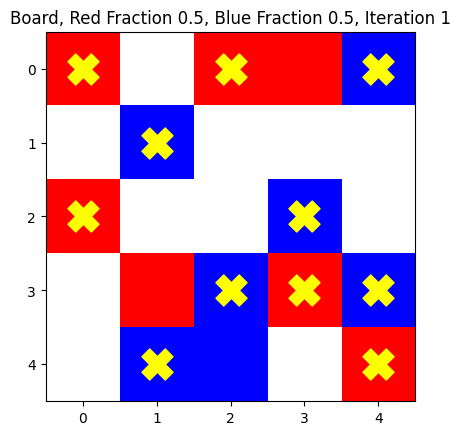

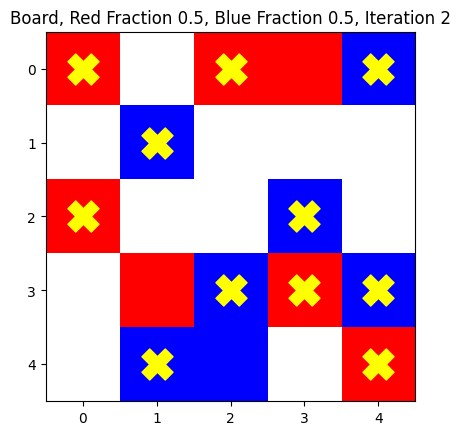

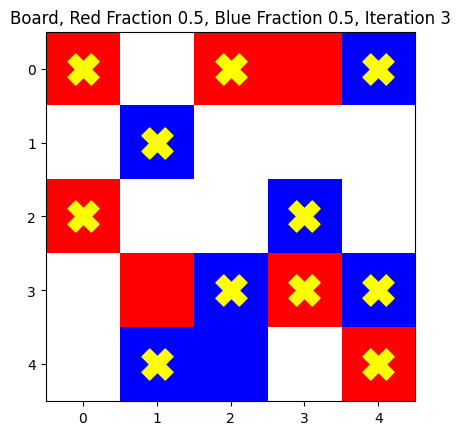

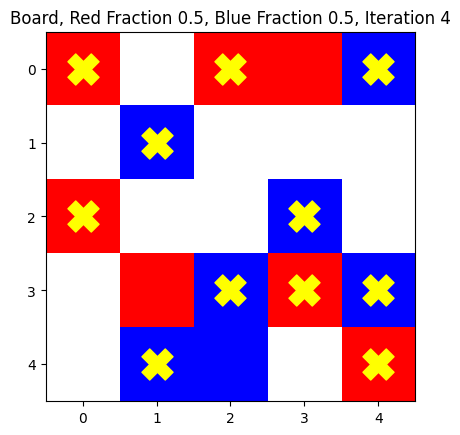

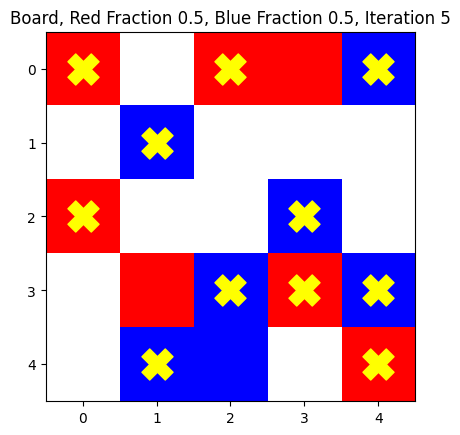

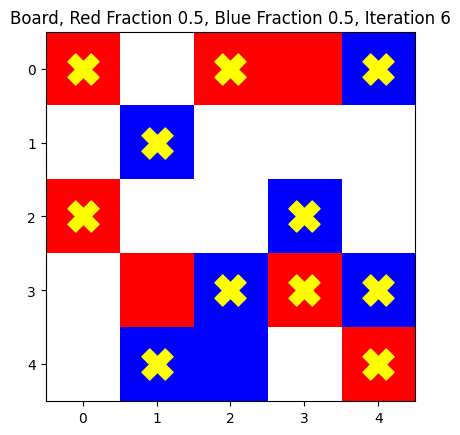

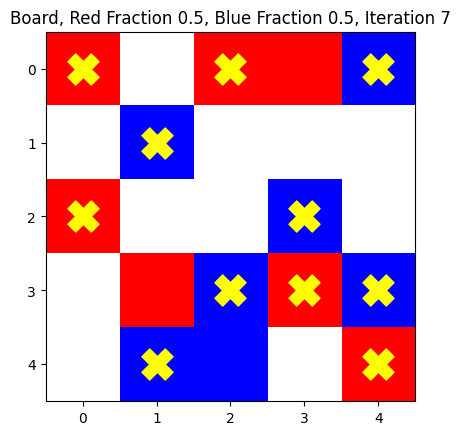

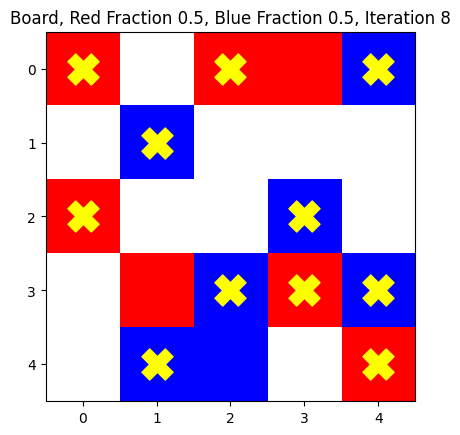

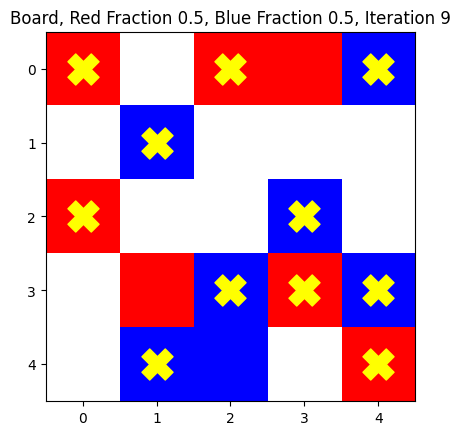

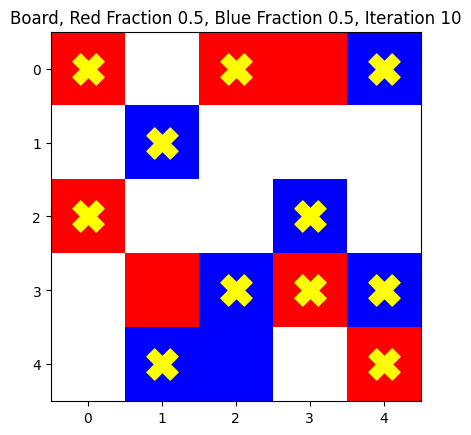

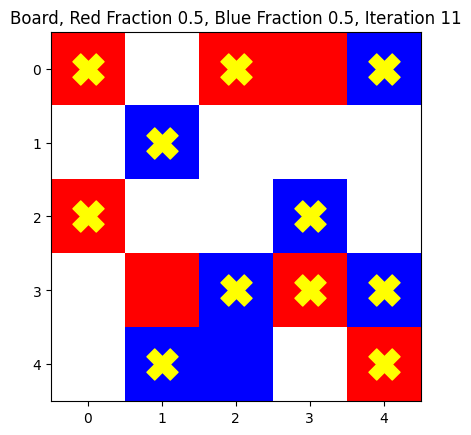

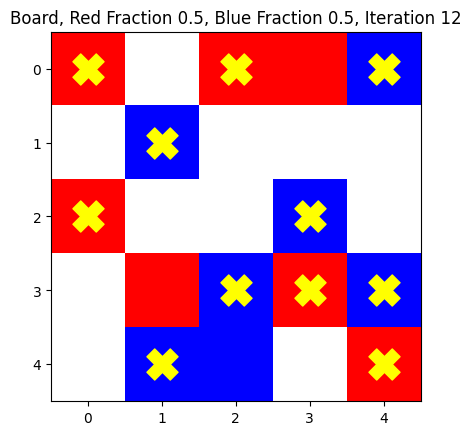

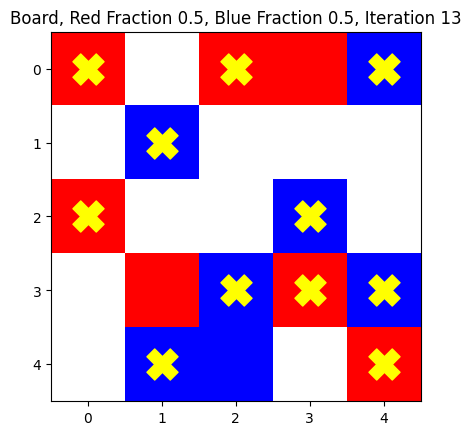

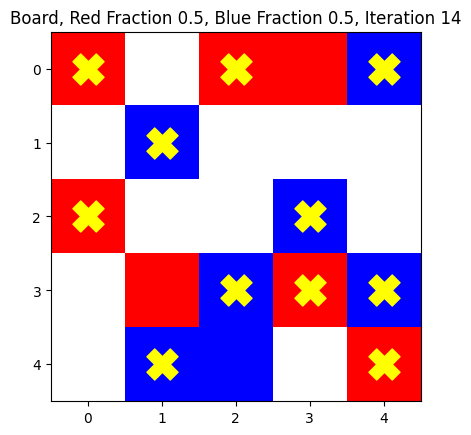

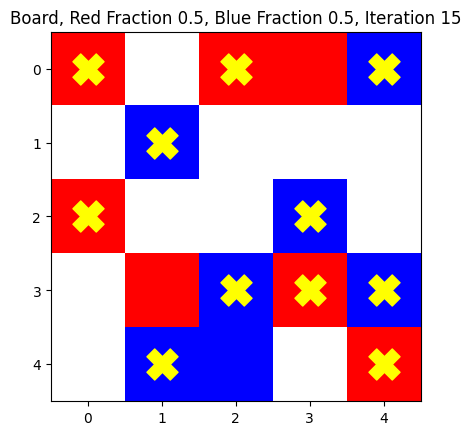

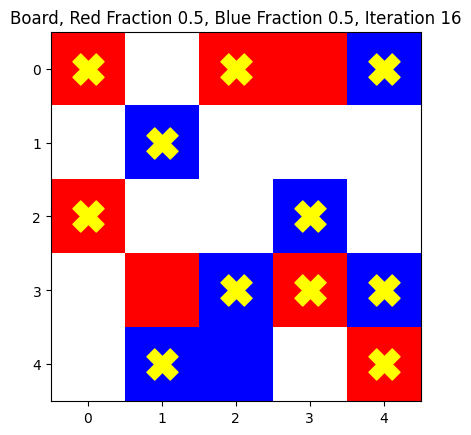

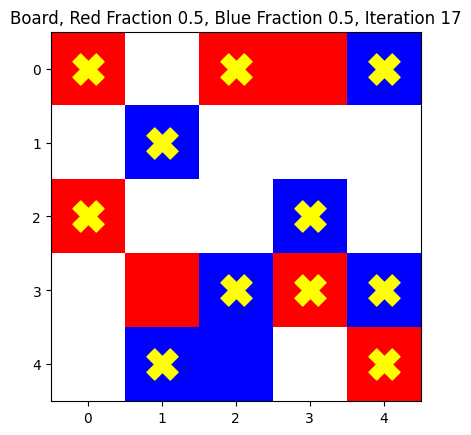

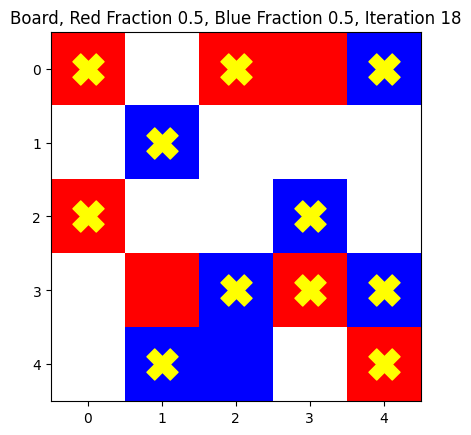

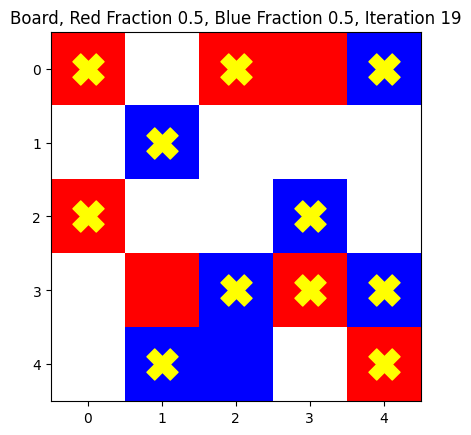

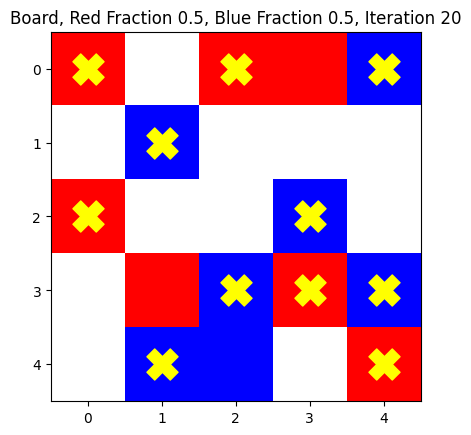

In [ ]:
check_case_example_from_handout()

Finished there are no better places for the unhappy cellse to go in 20 iterations.


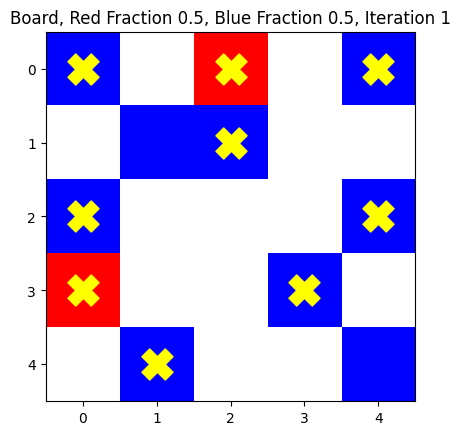

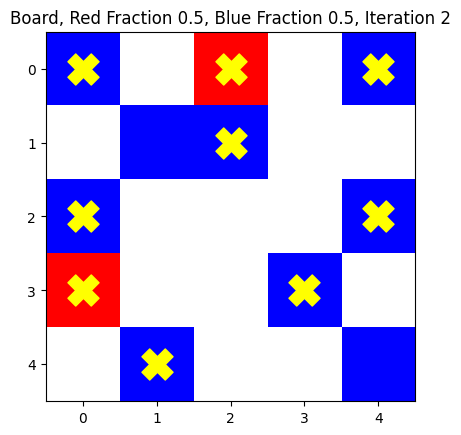

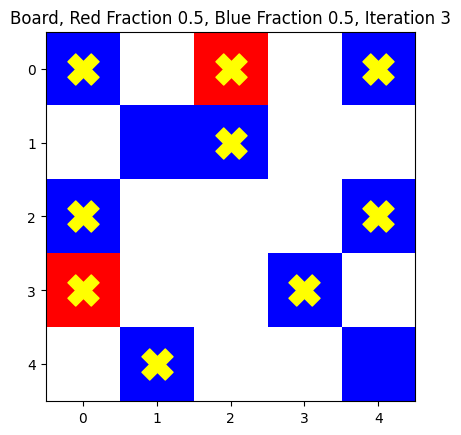

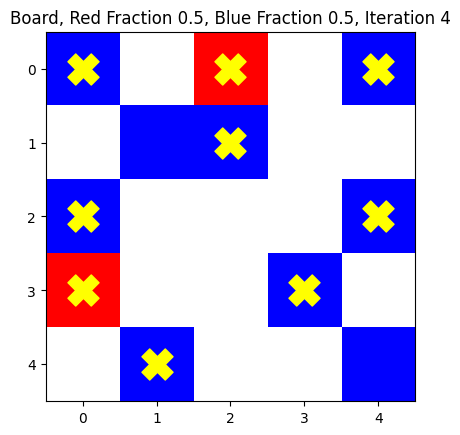

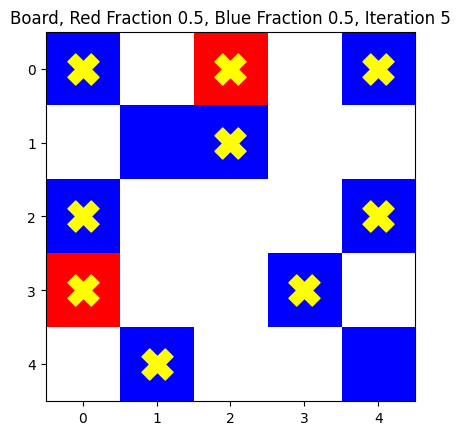

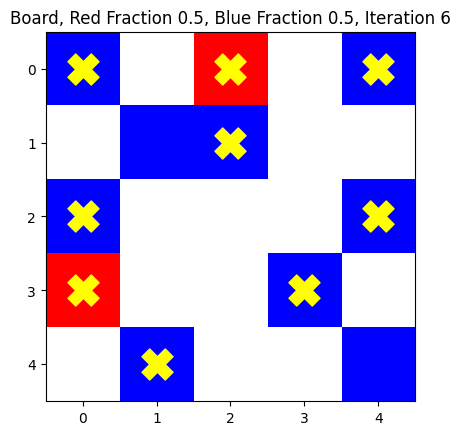

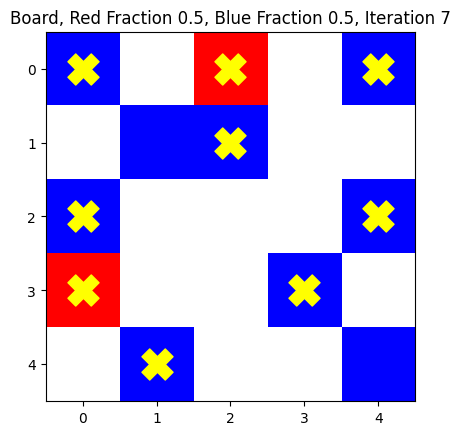

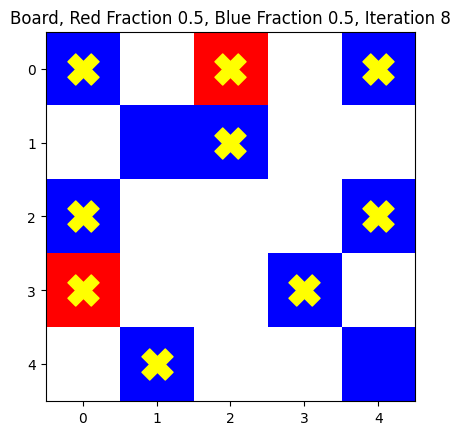

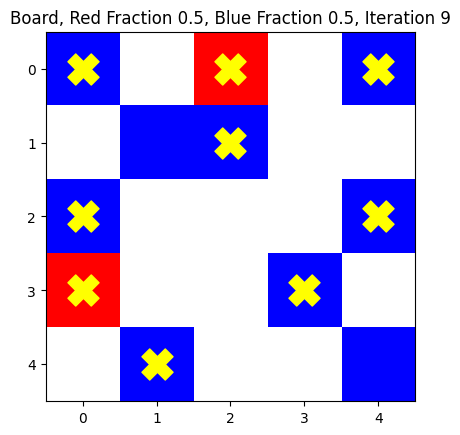

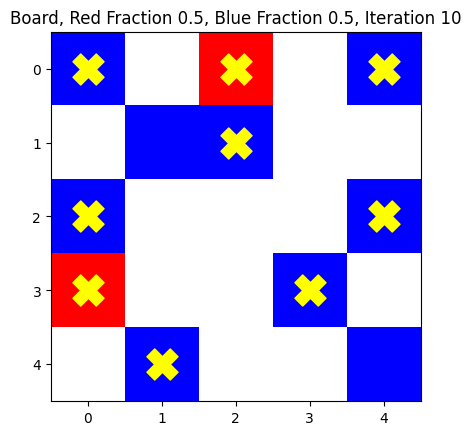

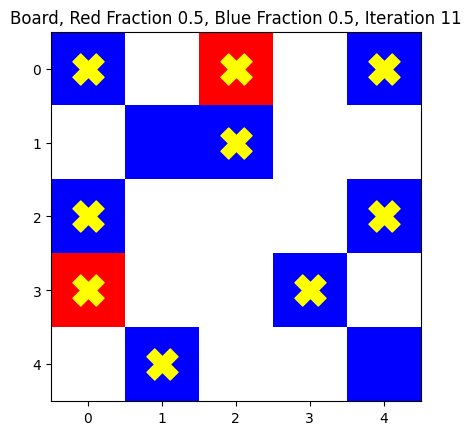

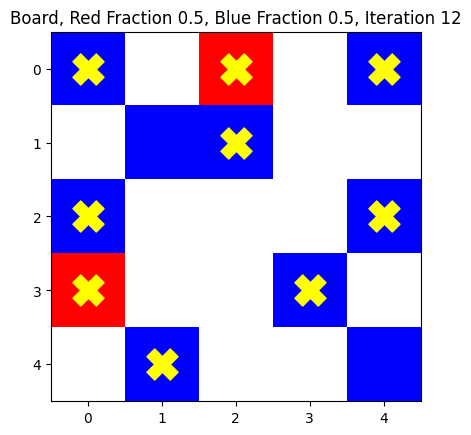

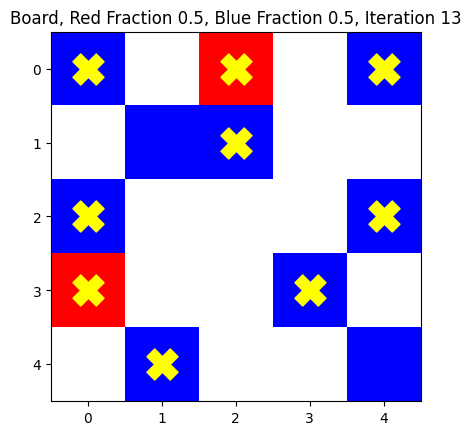

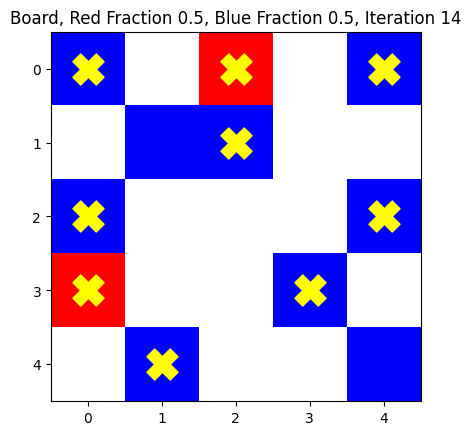

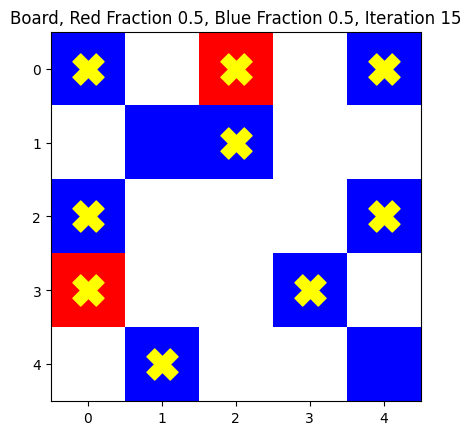

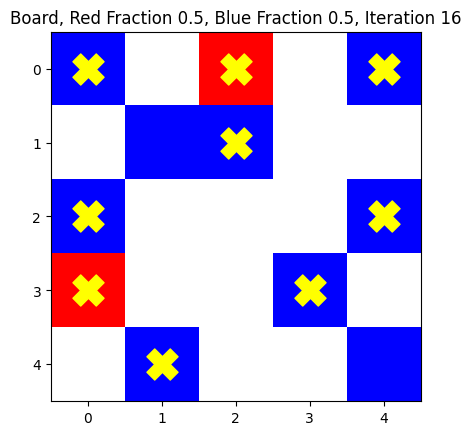

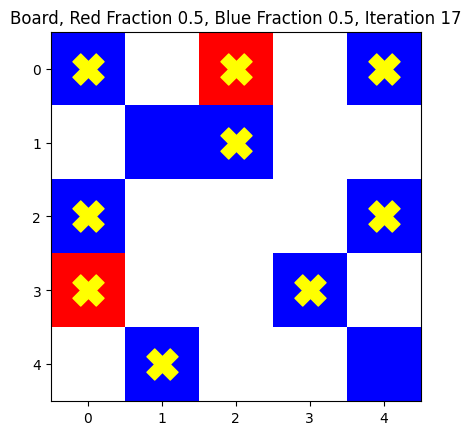

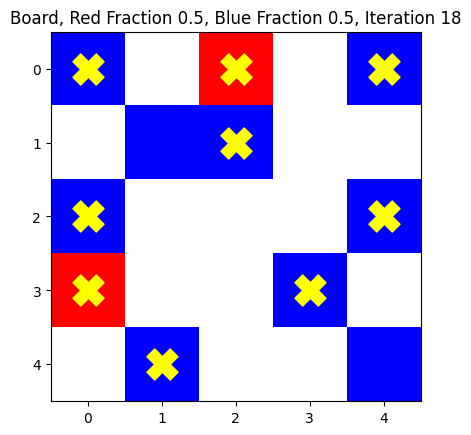

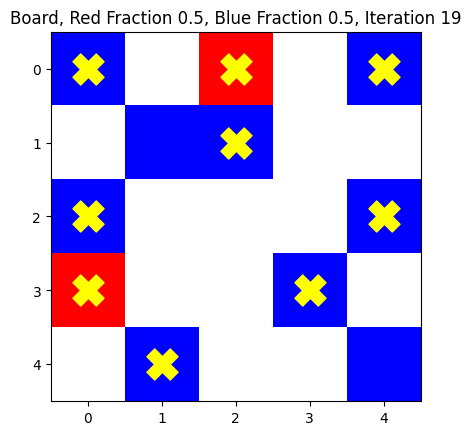

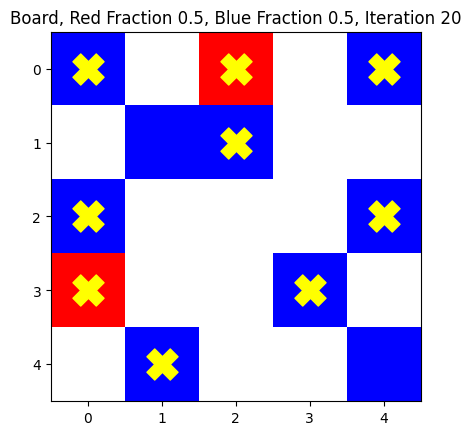

In [ ]:
check_case_where_fraction_is_not_satisfied()

Finished there are no better places for the unhappy cellse to go in 20 iterations.


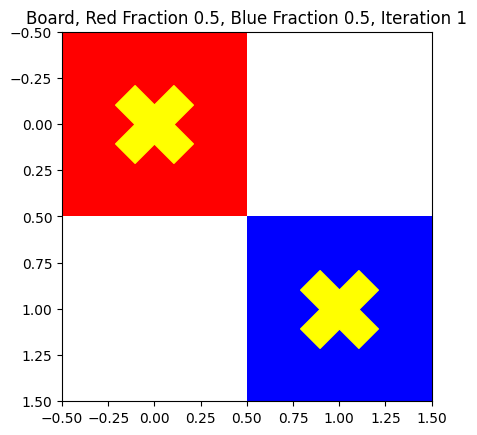

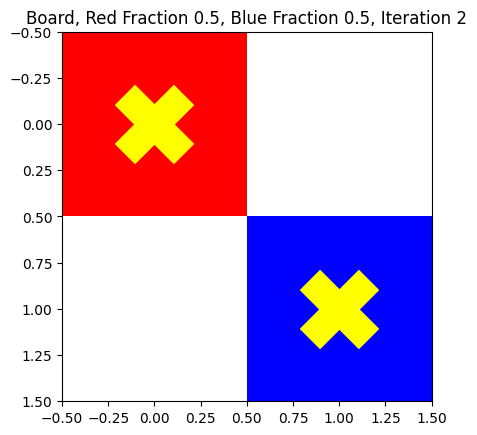

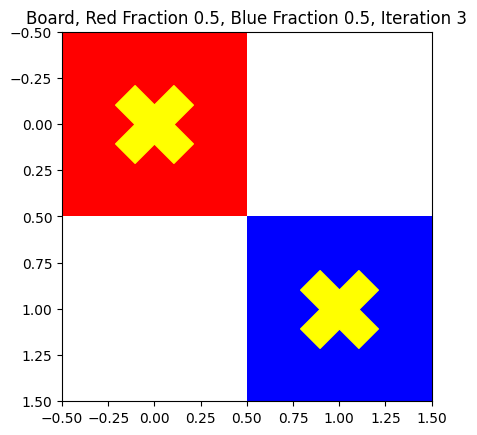

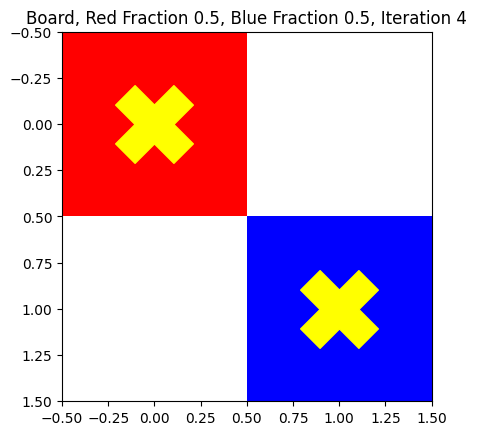

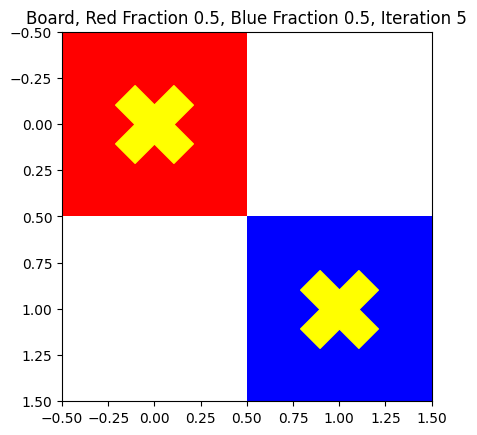

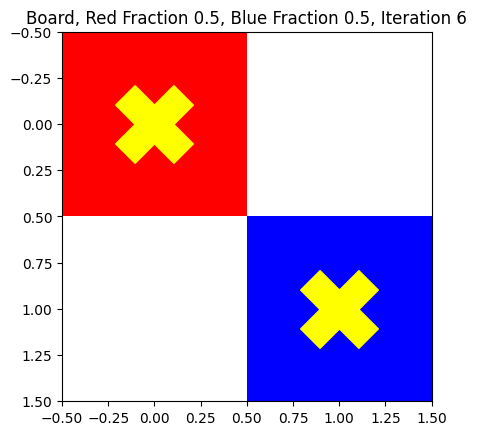

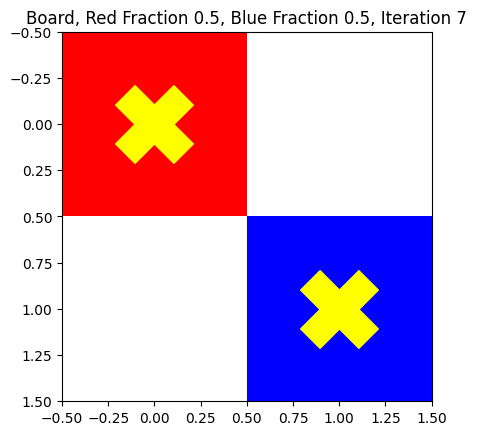

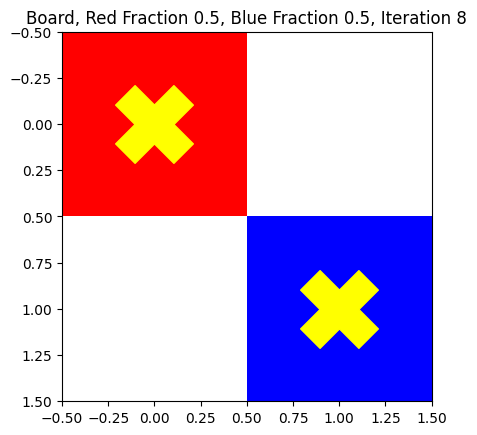

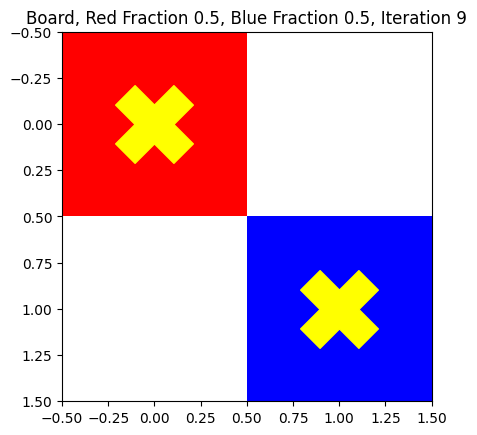

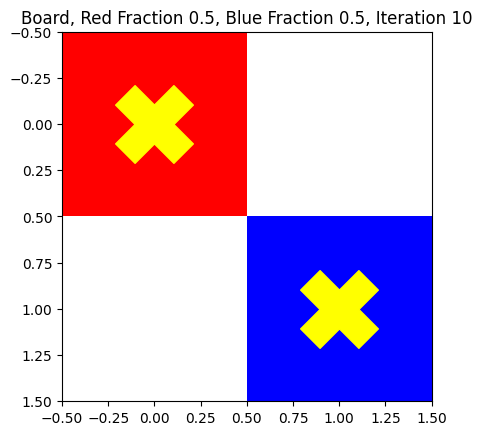

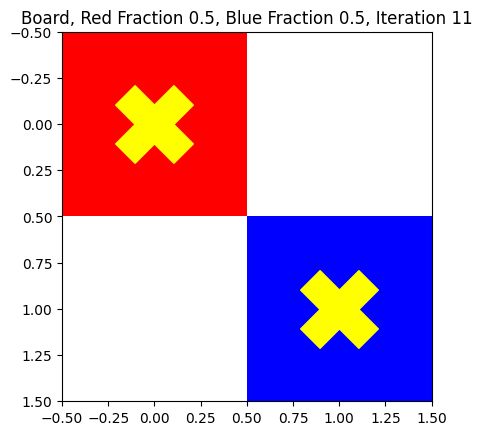

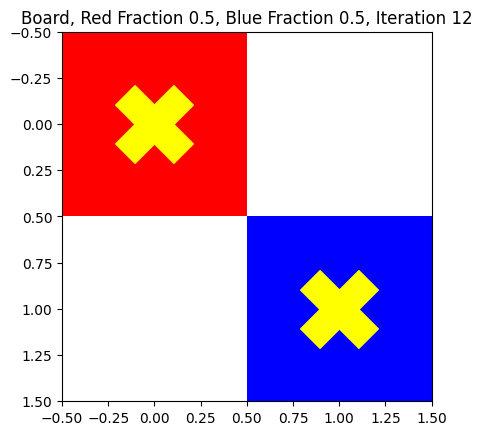

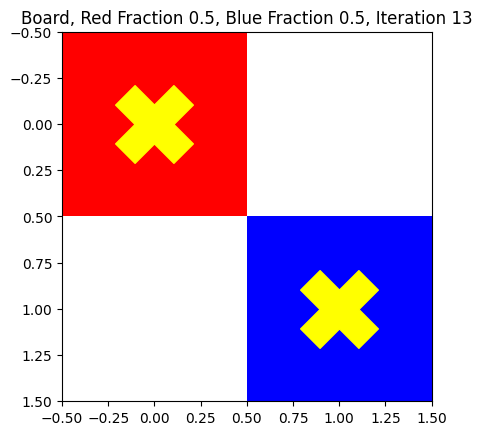

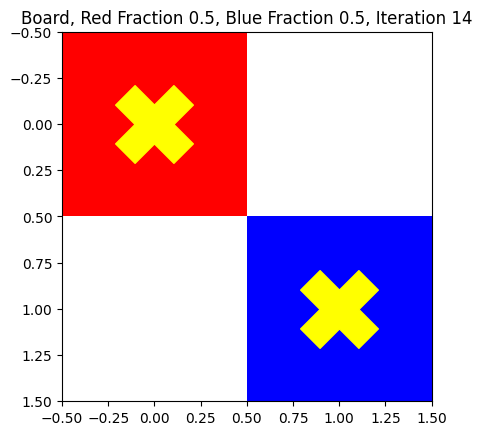

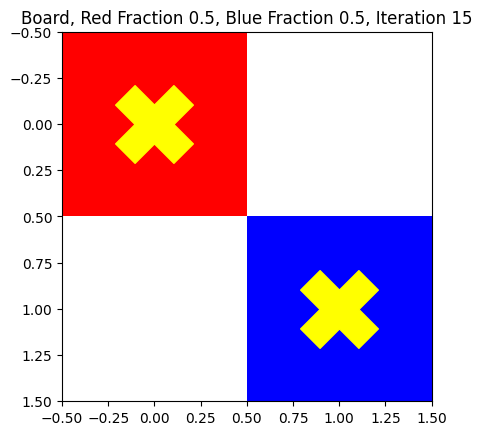

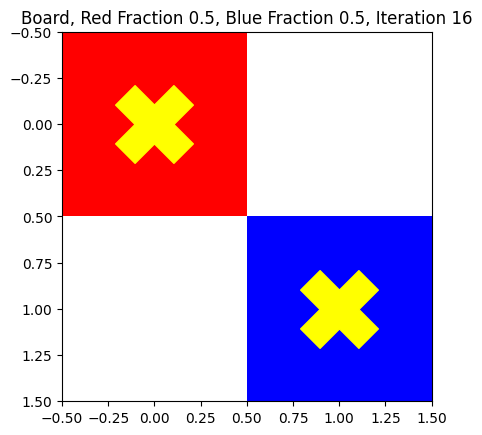

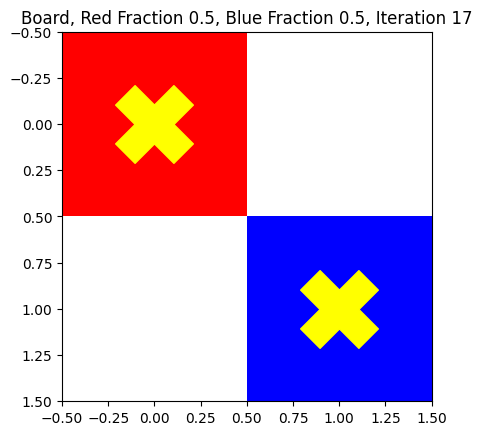

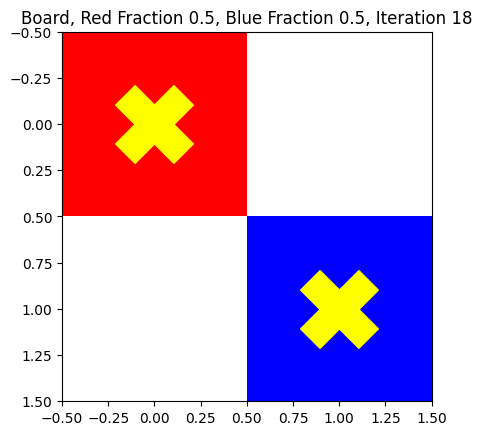

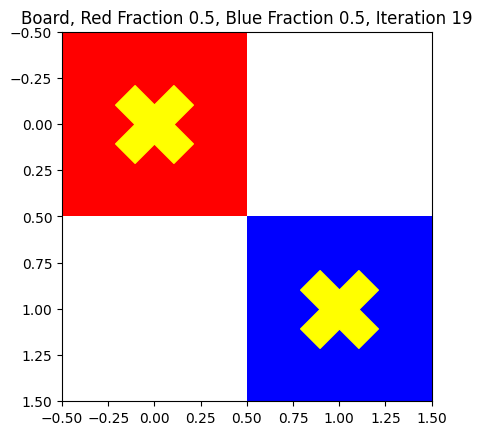

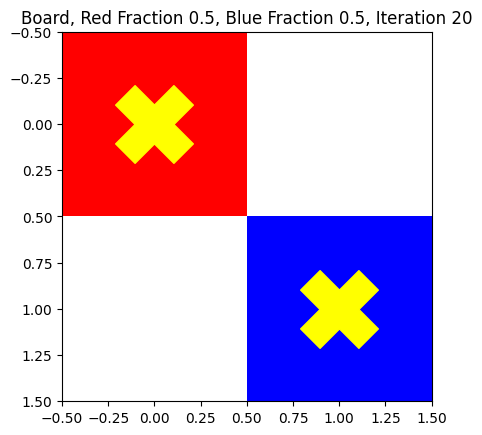

In [ ]:
check_case_with_stuck_game()

Finished there are no better places for the unhappy cellse to go in 20 iterations.


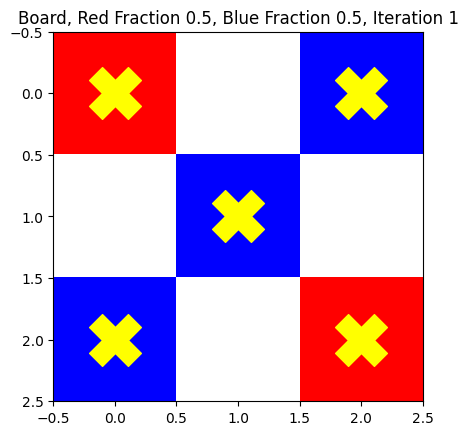

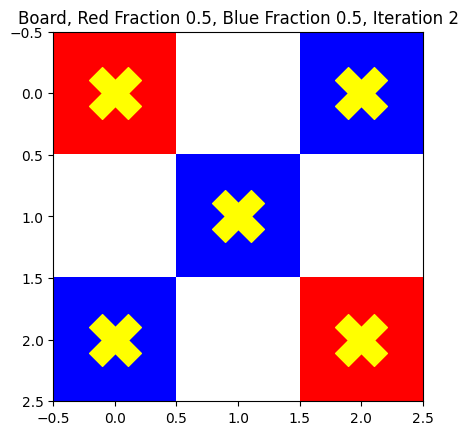

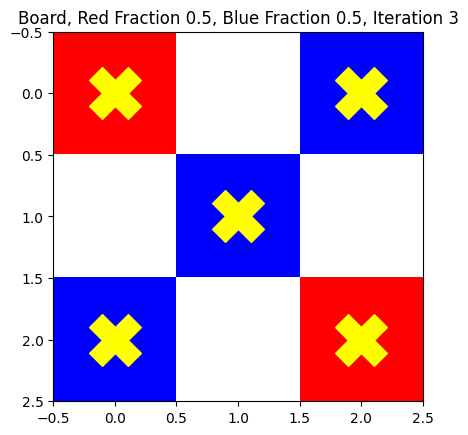

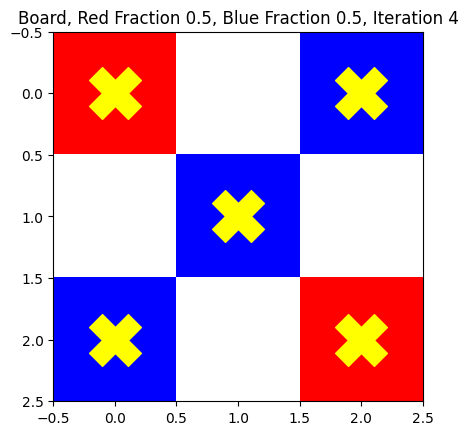

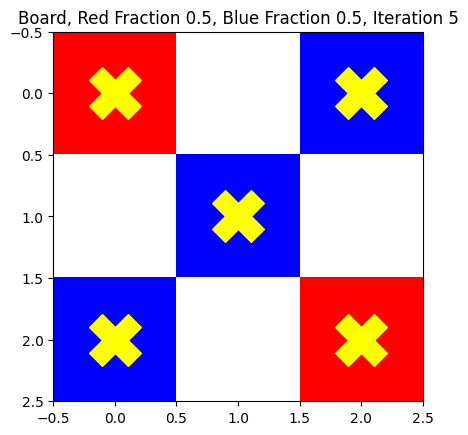

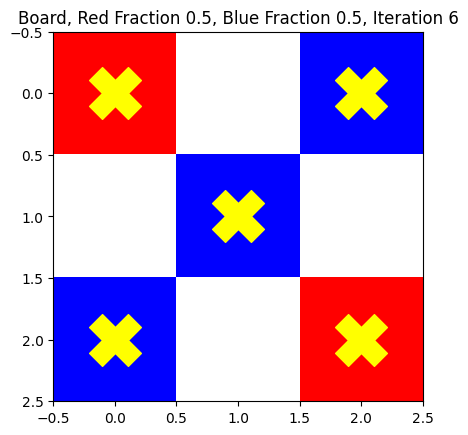

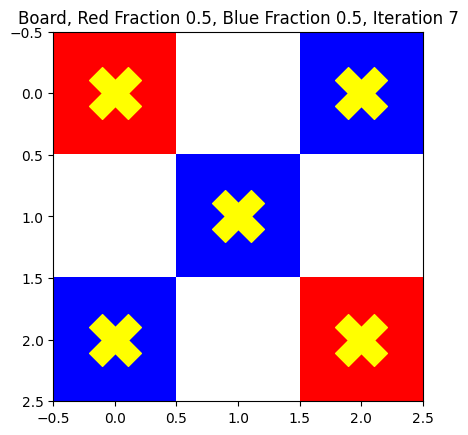

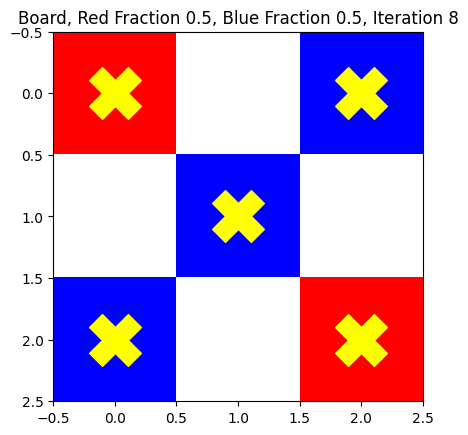

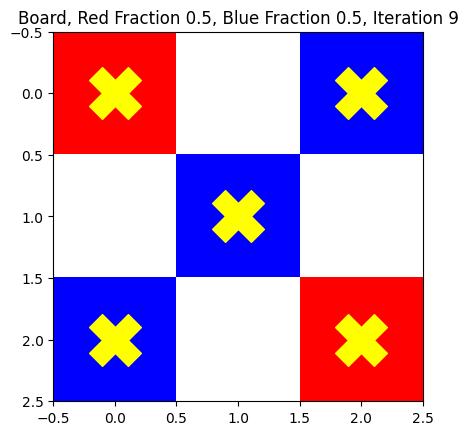

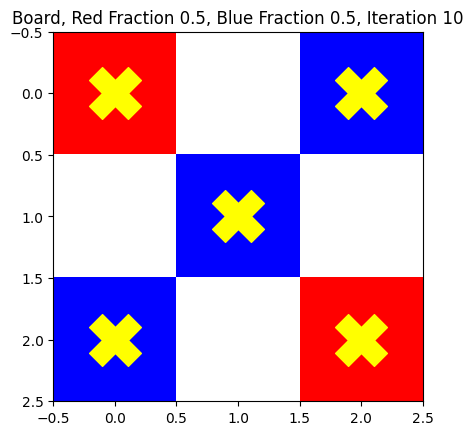

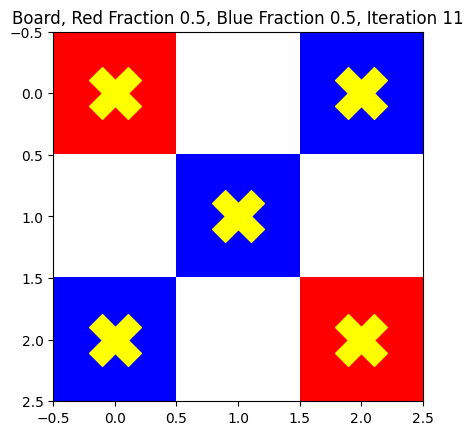

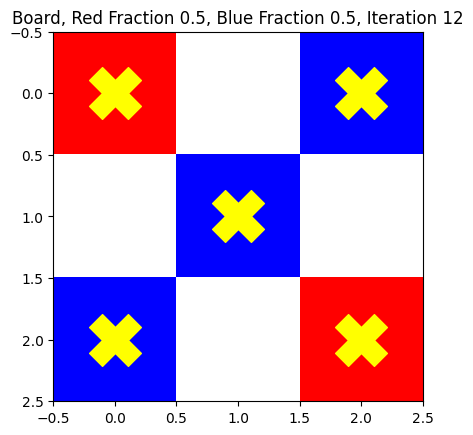

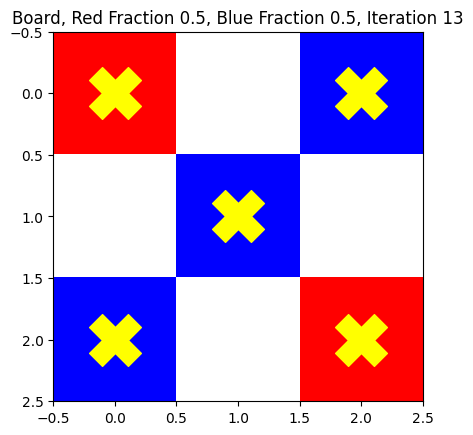

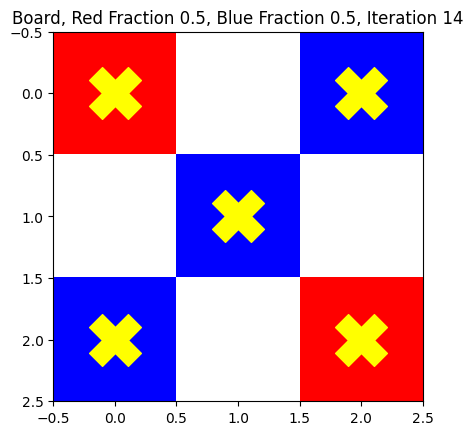

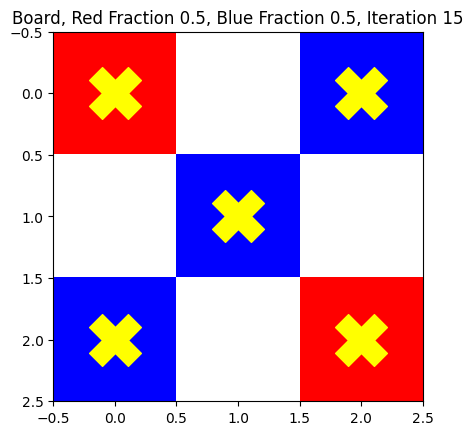

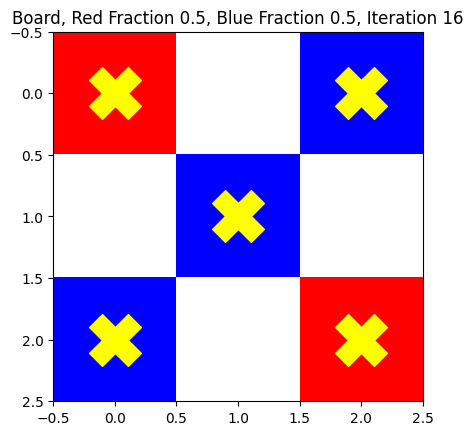

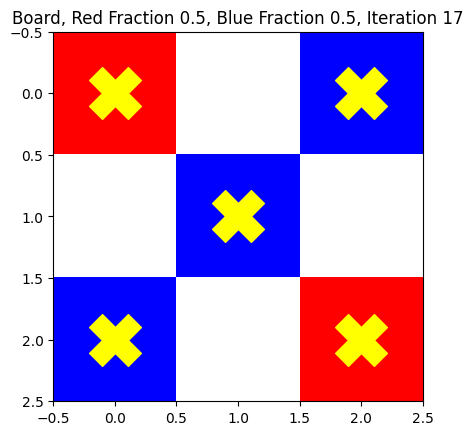

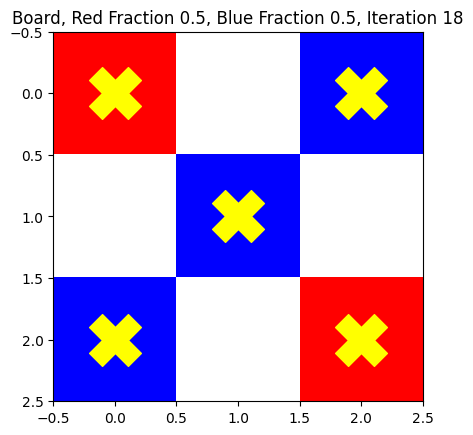

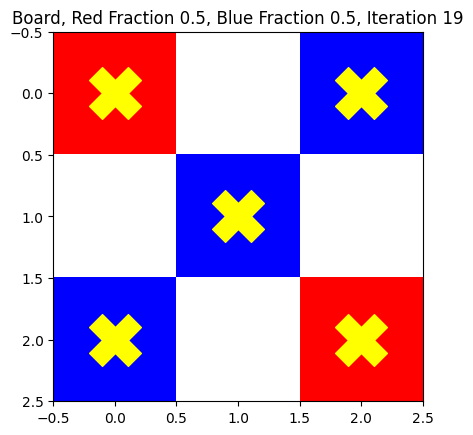

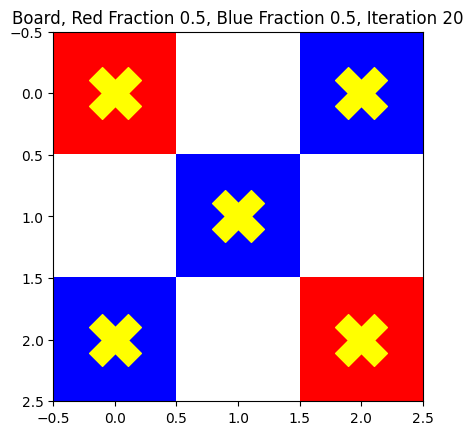

In [ ]:
check_case_with_even_neighbors()

Finished there are no better places for the unhappy cellse to go in 20 iterations.


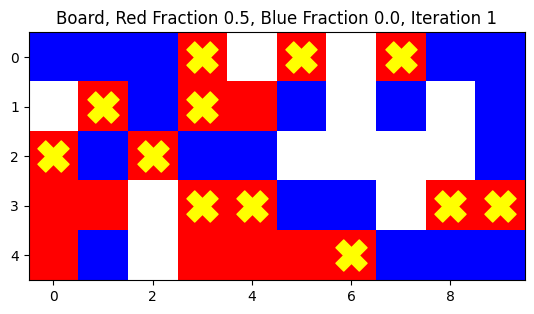

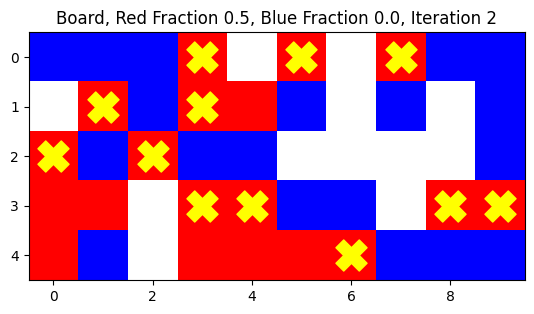

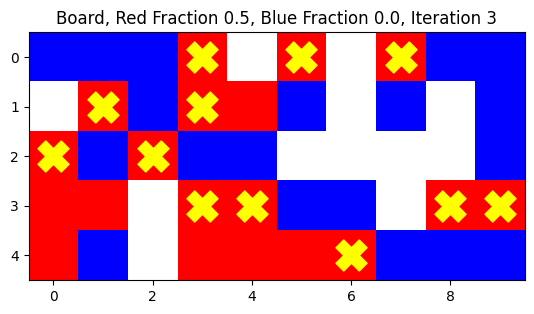

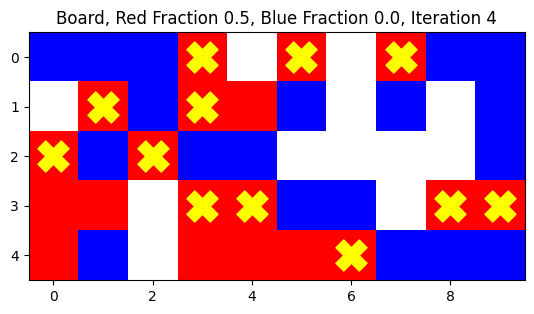

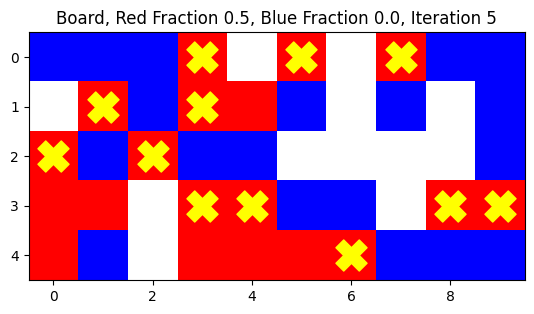

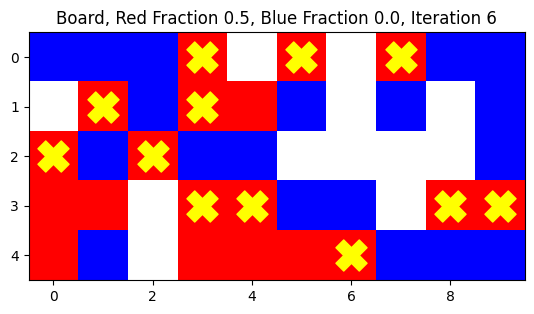

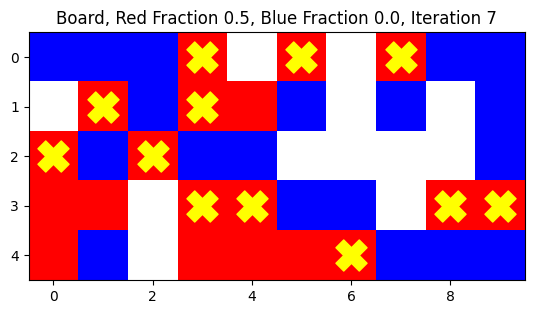

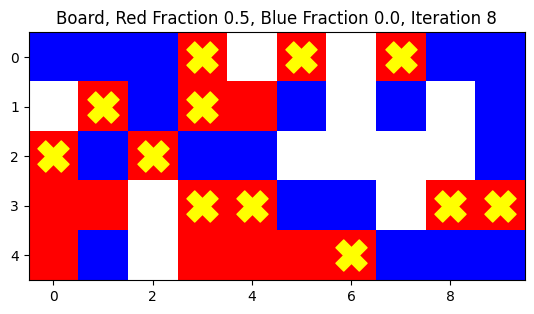

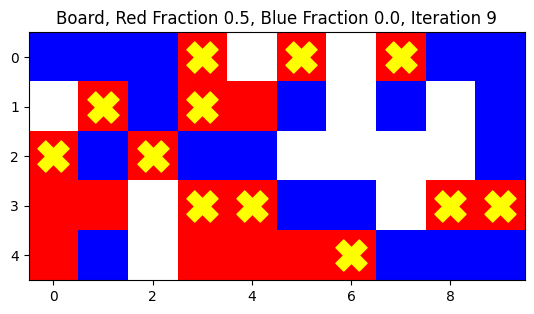

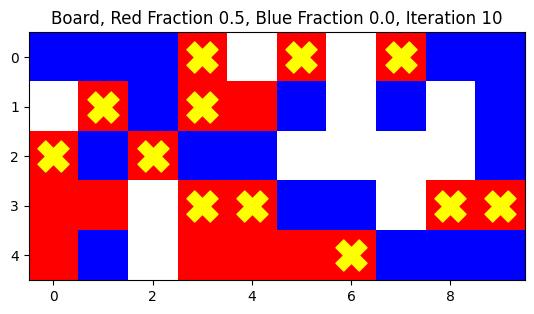

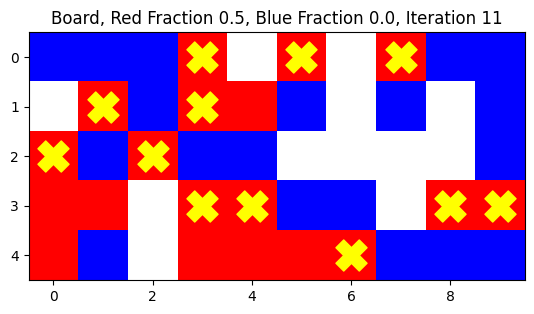

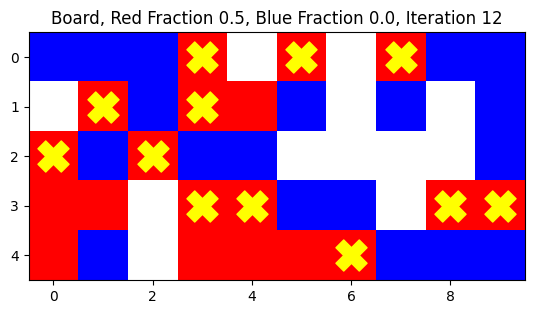

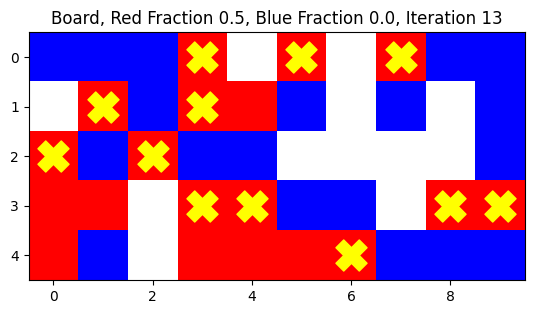

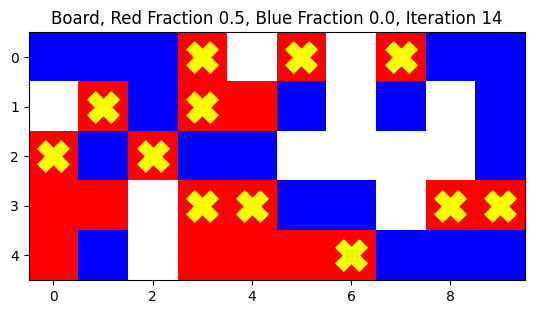

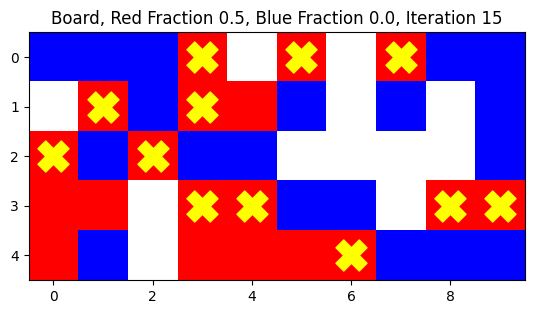

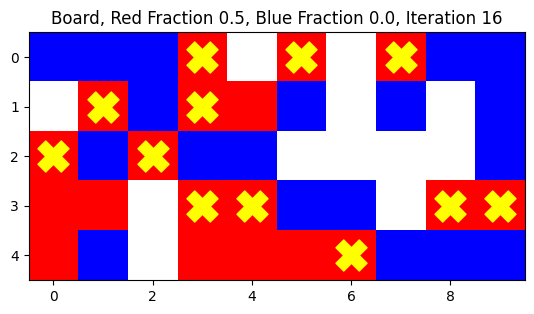

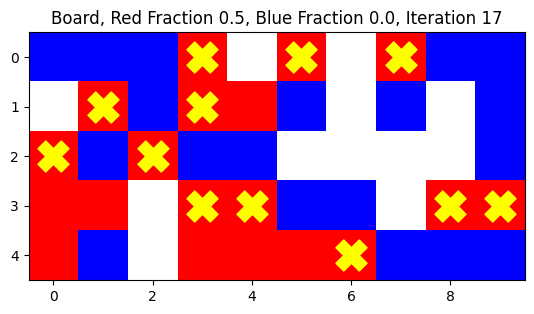

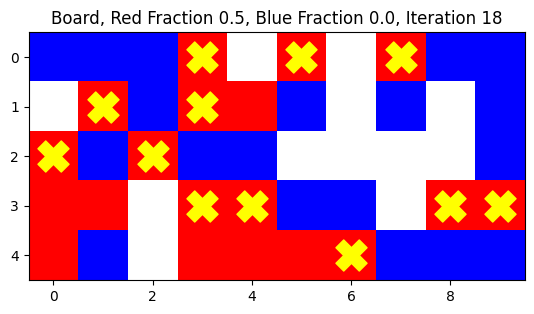

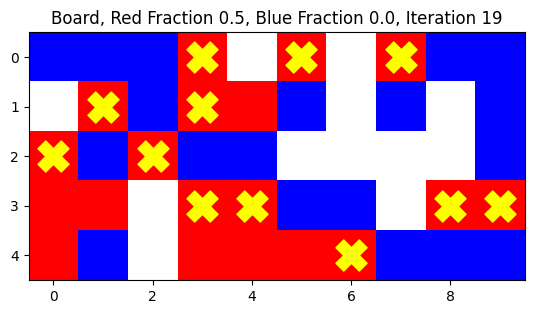

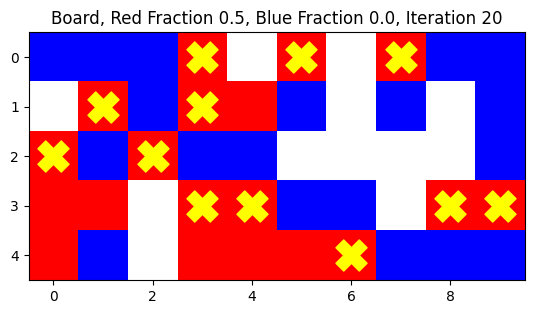

In [ ]:
check_case_where_one_team_does_not_care()

Finished there are no better places for the unhappy cellse to go in 20 iterations.


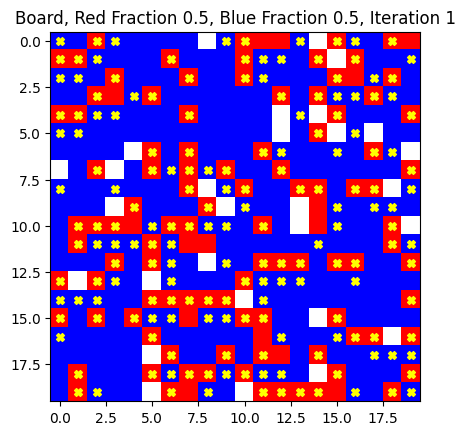

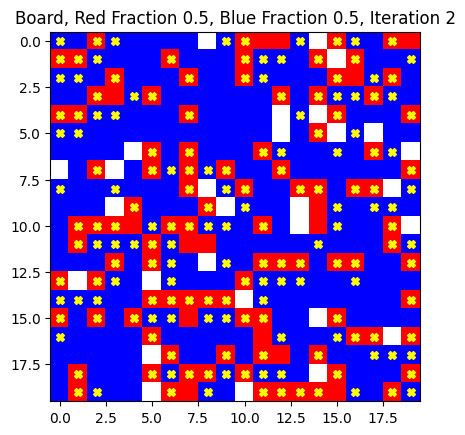

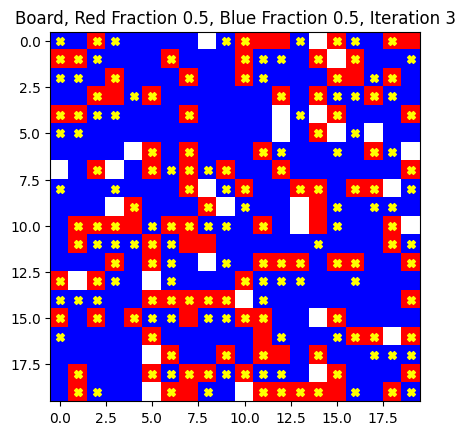

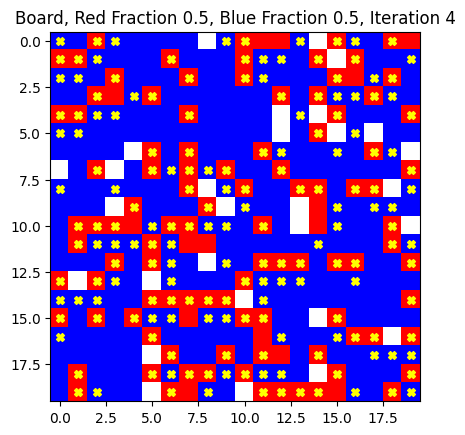

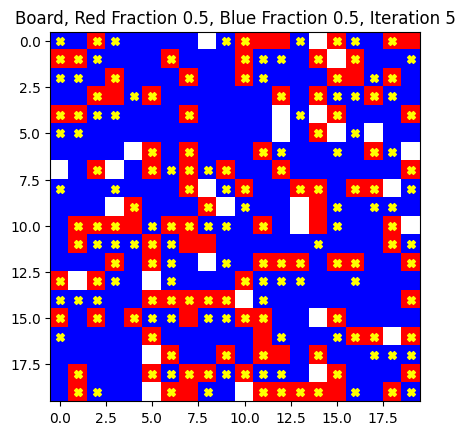

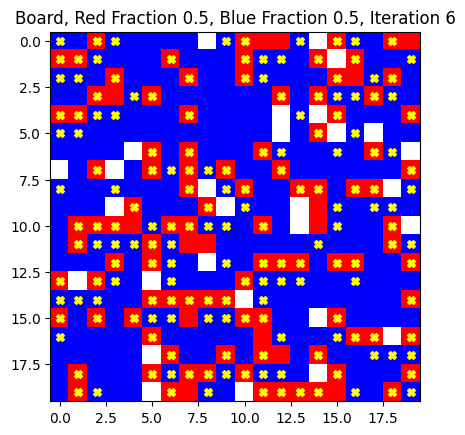

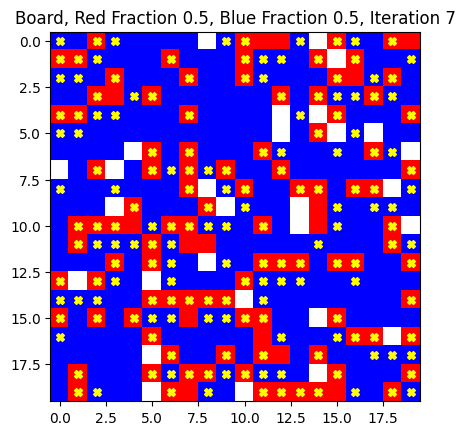

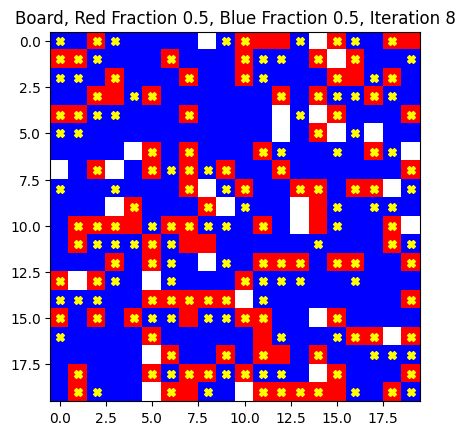

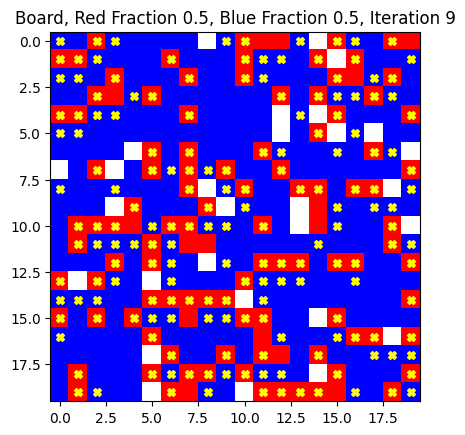

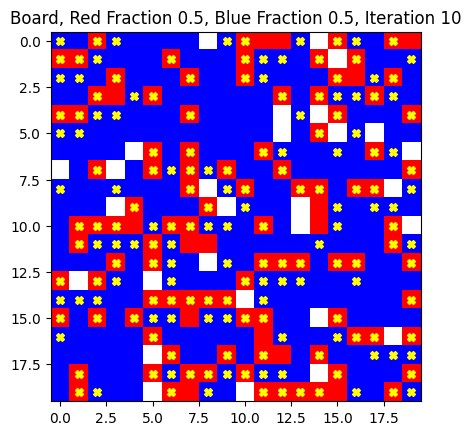

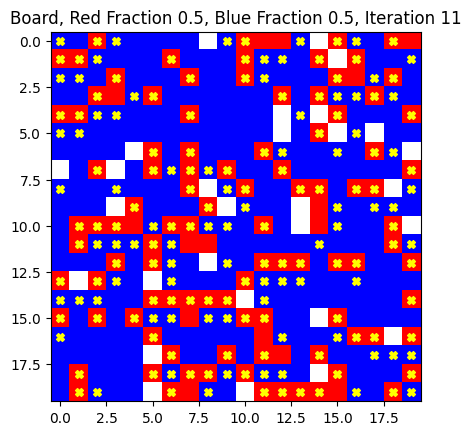

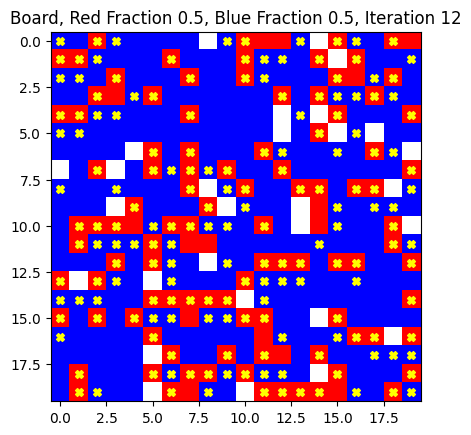

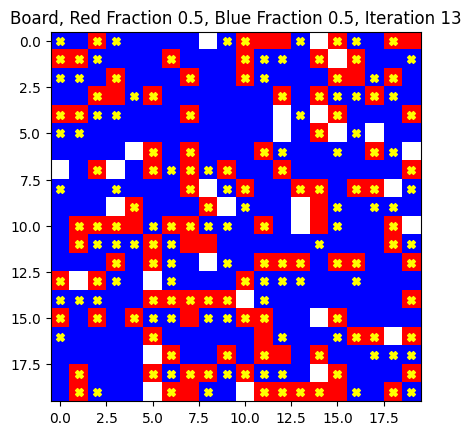

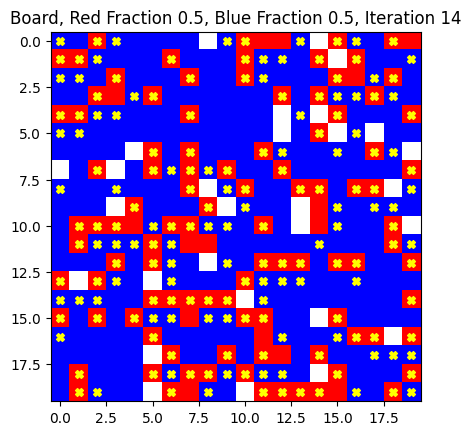

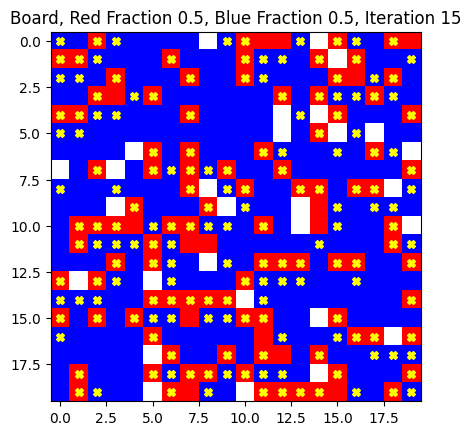

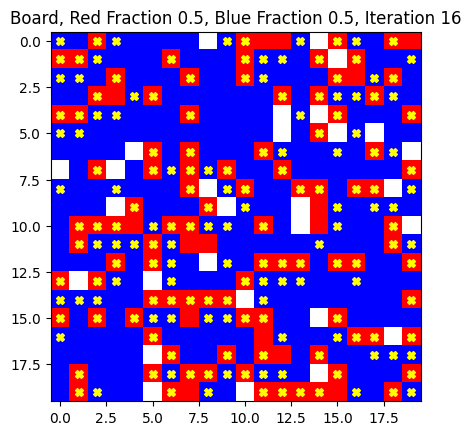

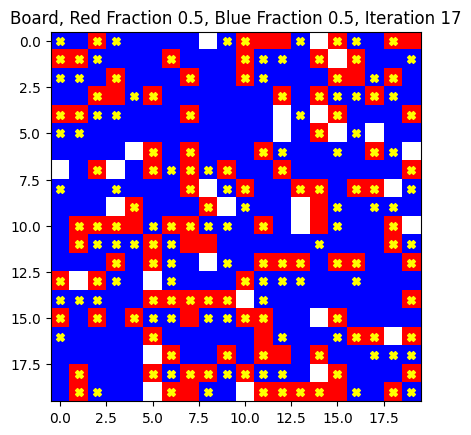

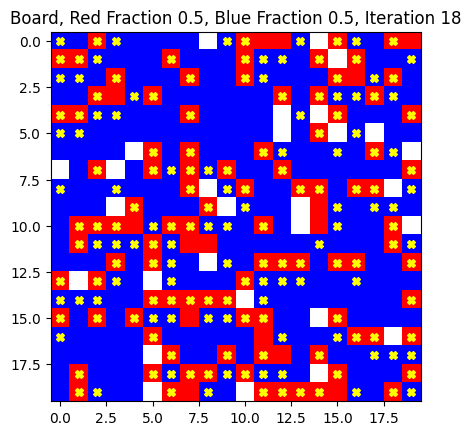

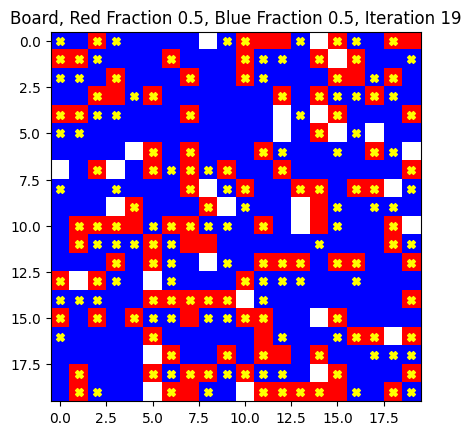

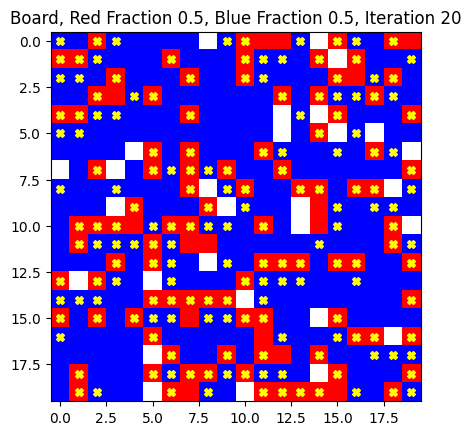

In [ ]:
check_case_with_unbalanced_board()

Finished there are no better places for the unhappy cellse to go in 20 iterations.


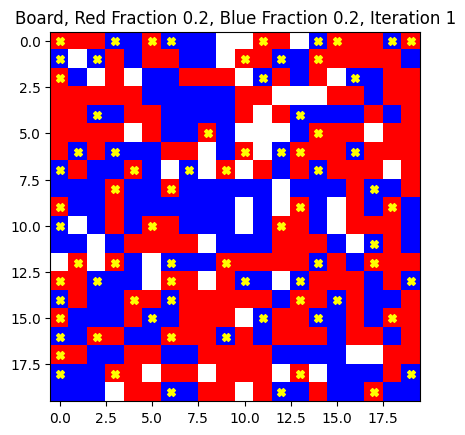

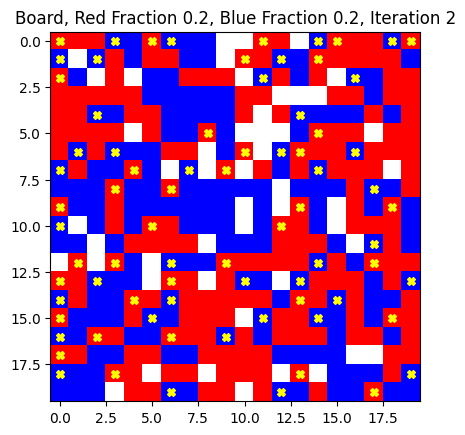

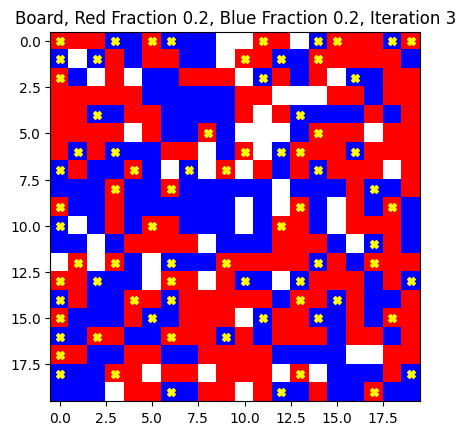

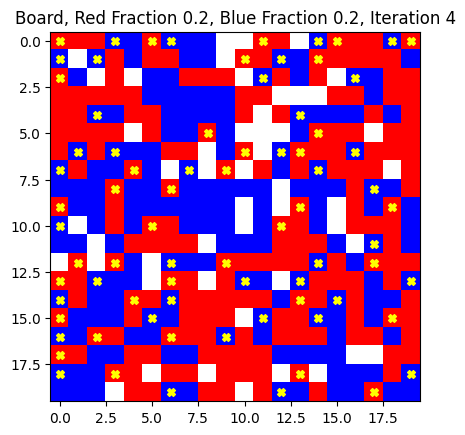

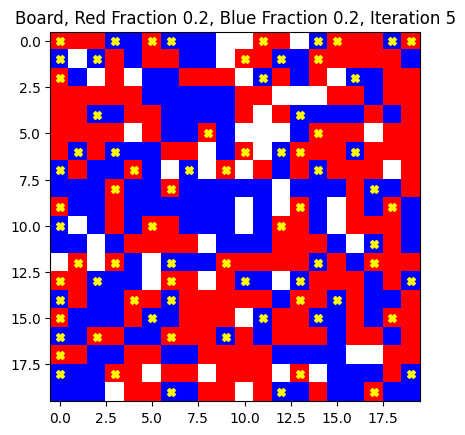

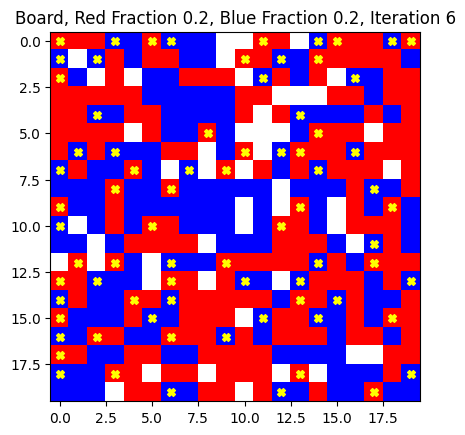

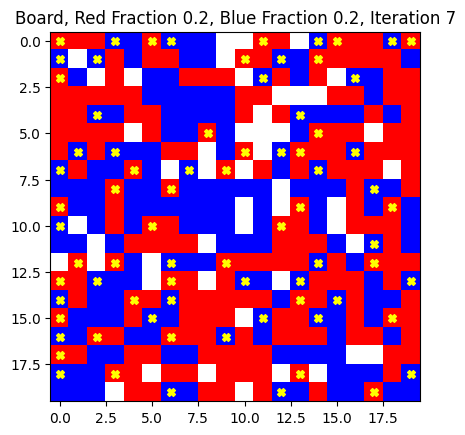

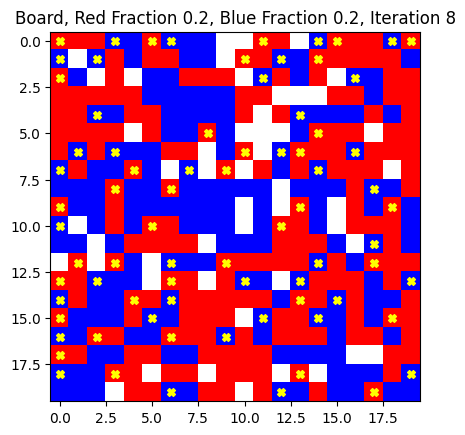

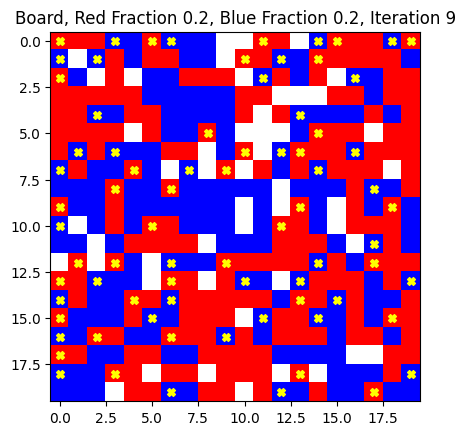

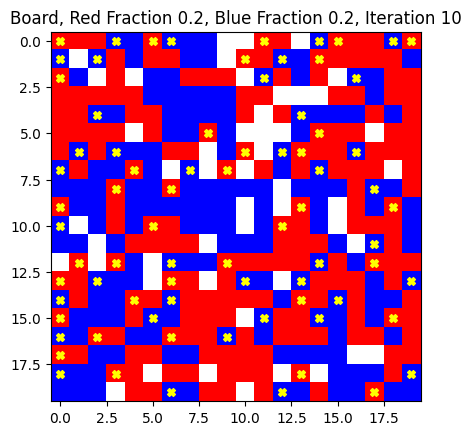

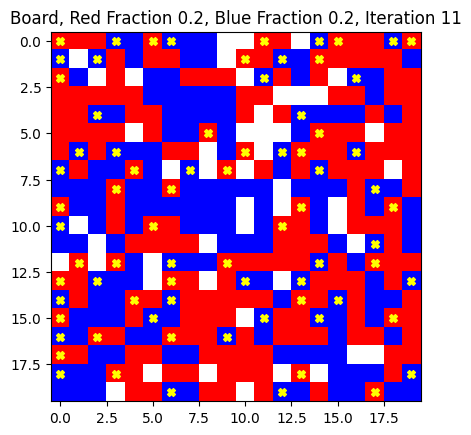

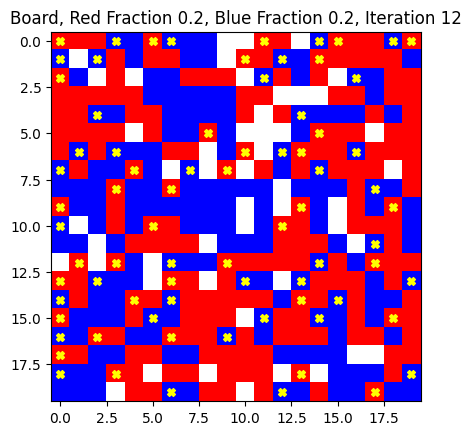

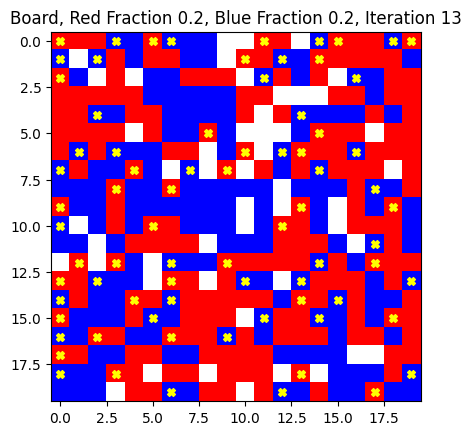

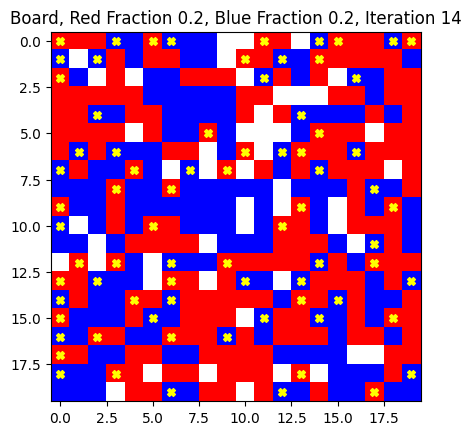

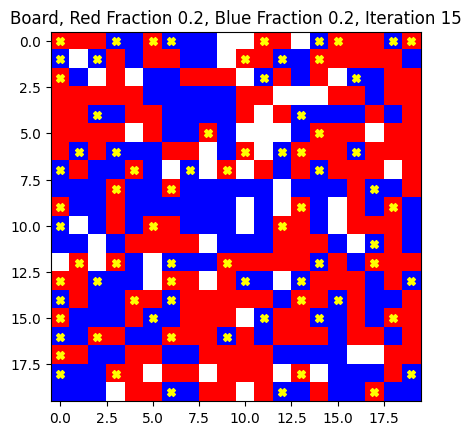

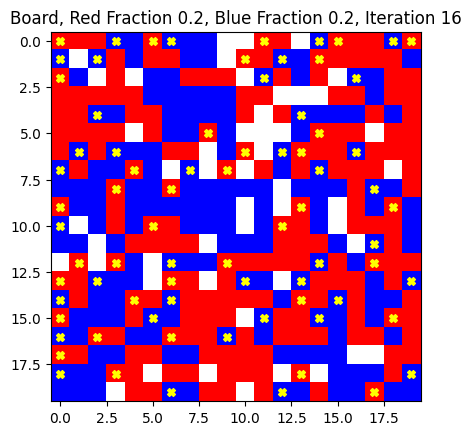

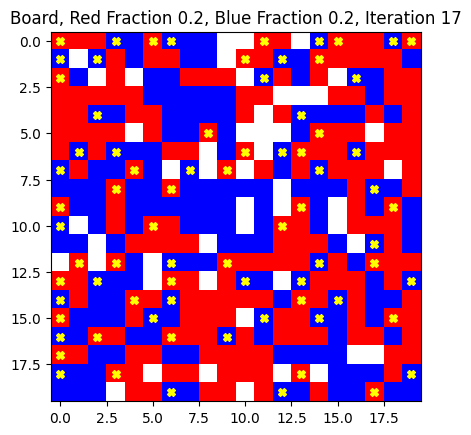

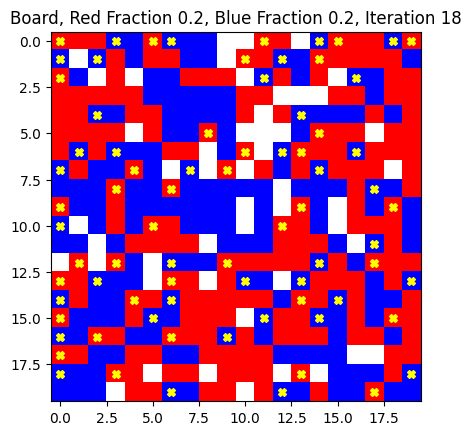

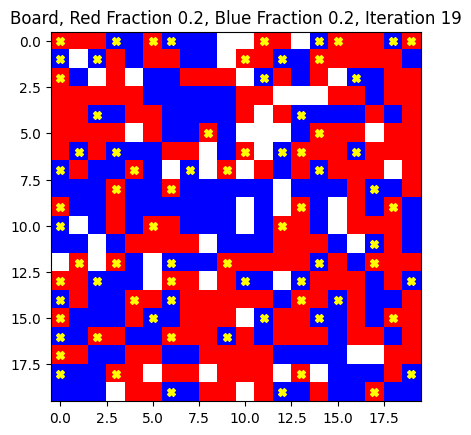

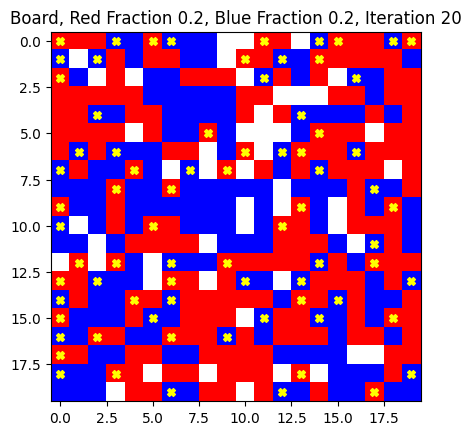

In [ ]:
check_case_with_slight_neighbor_preference()

Finished there are no better places for the unhappy cellse to go in 20 iterations.


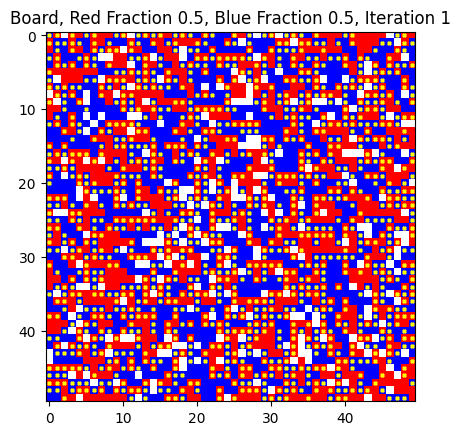

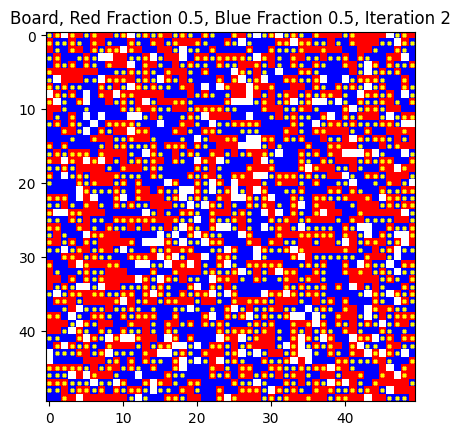

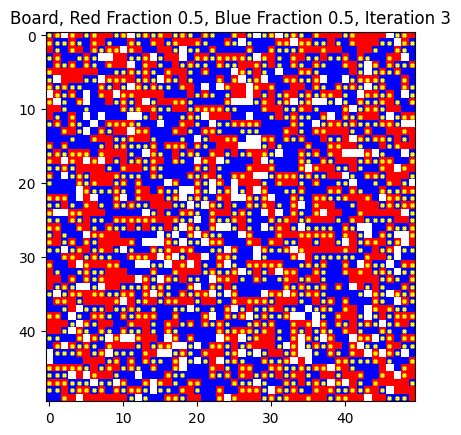

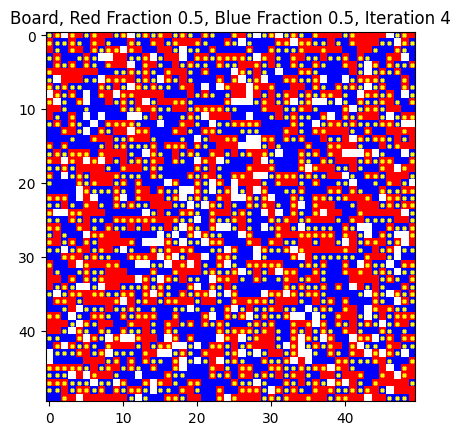

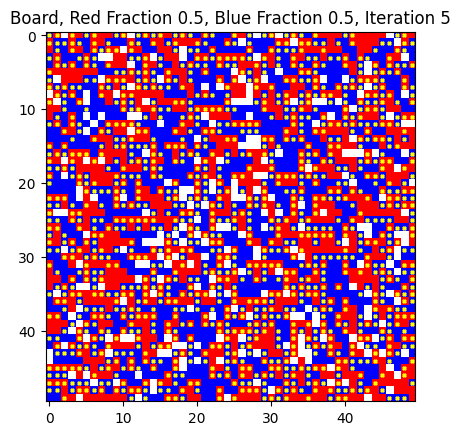

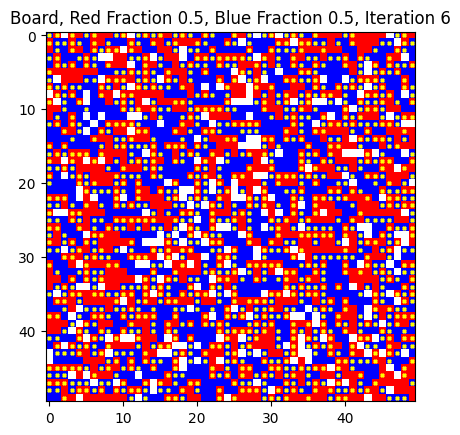

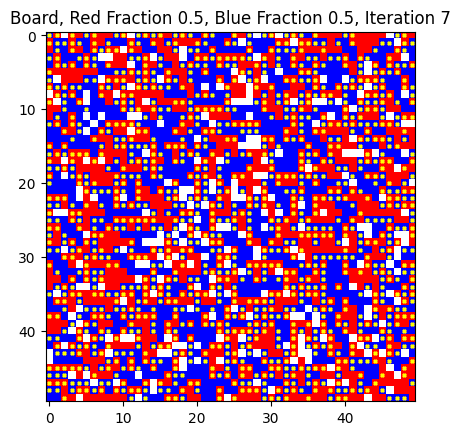

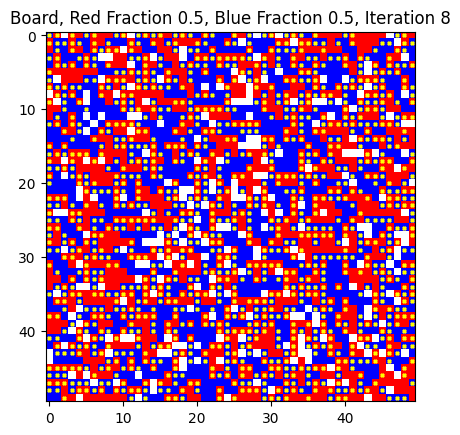

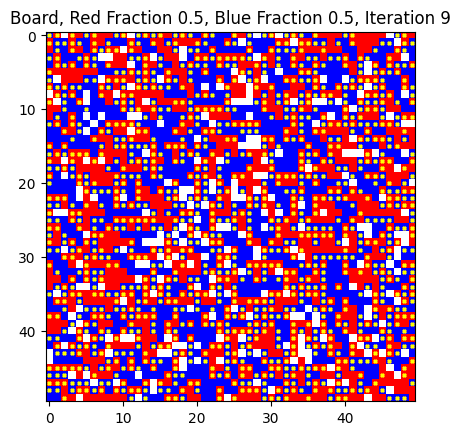

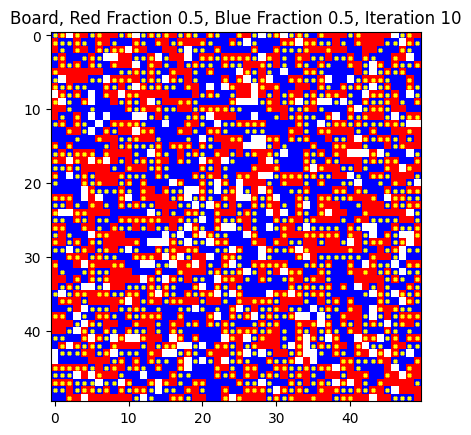

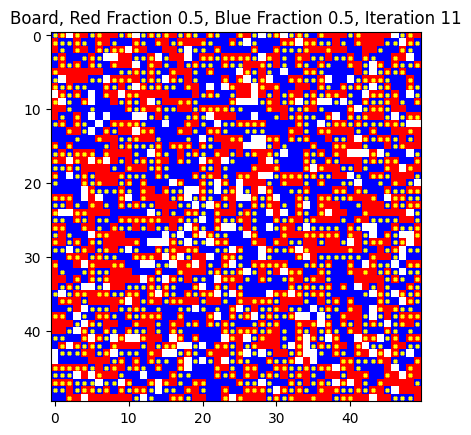

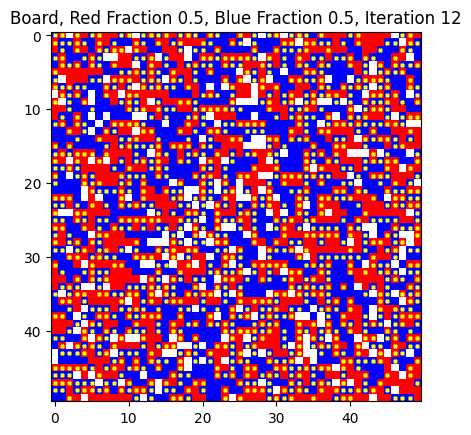

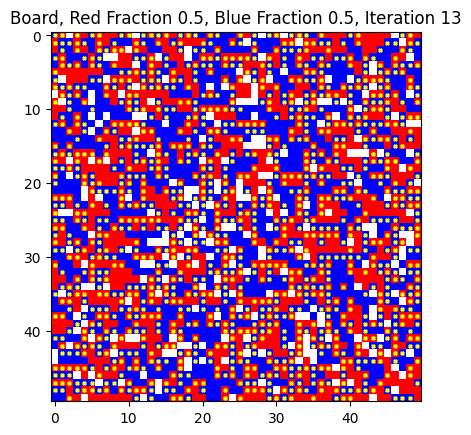

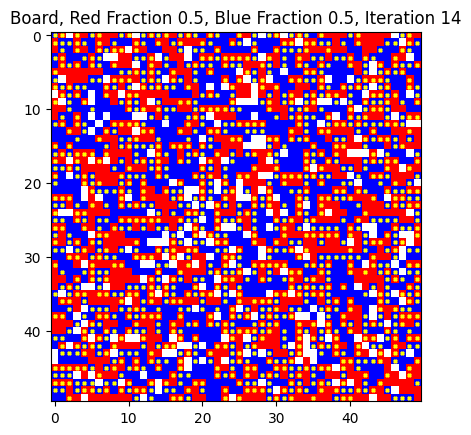

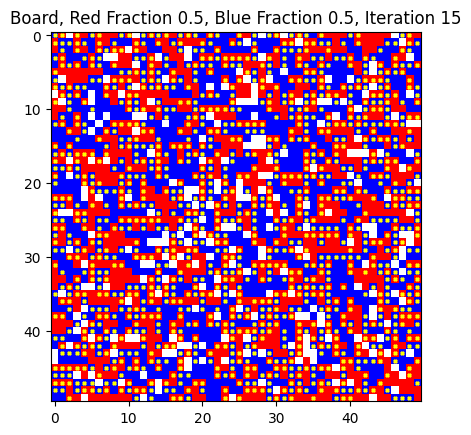

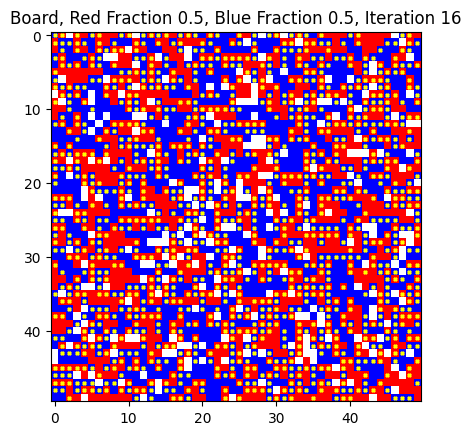

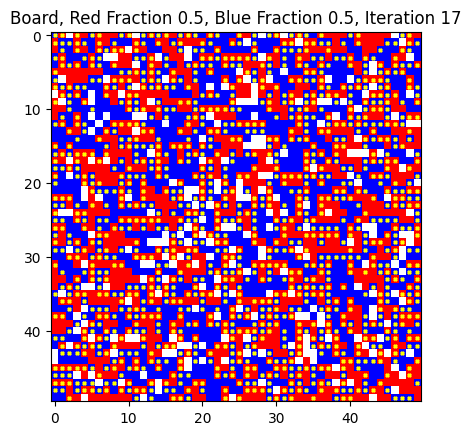

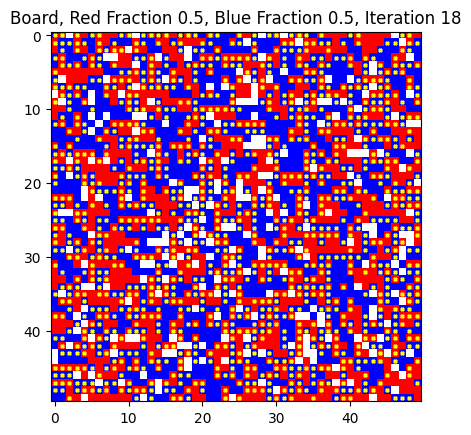

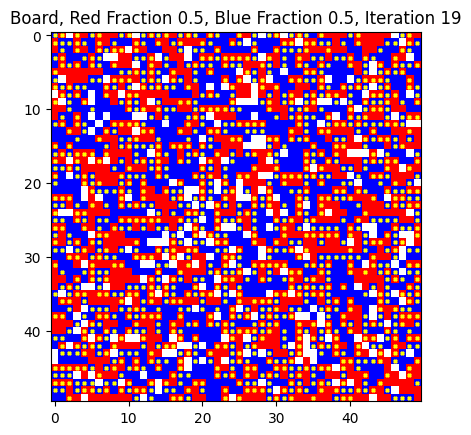

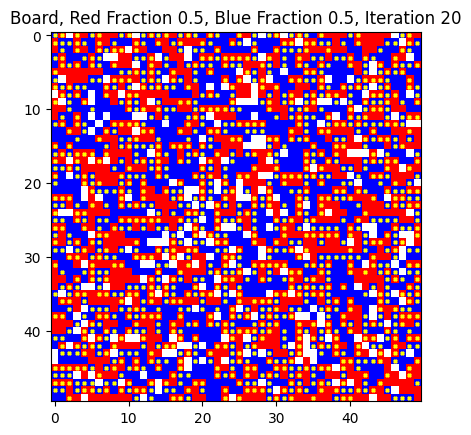

In [ ]:
check_case_with_large_crowded_board()

Finished there are no better places for the unhappy cellse to go in 20 iterations.


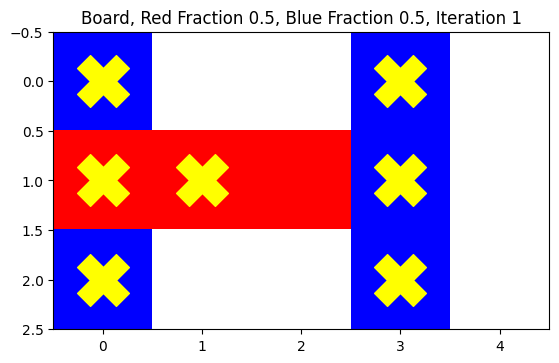

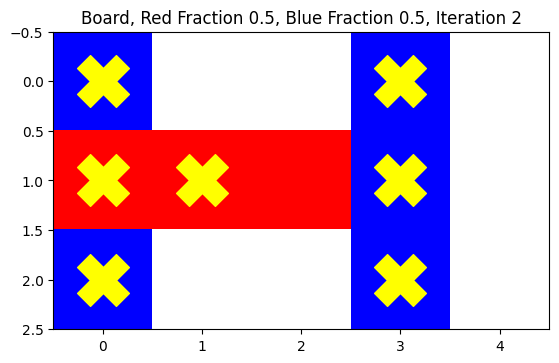

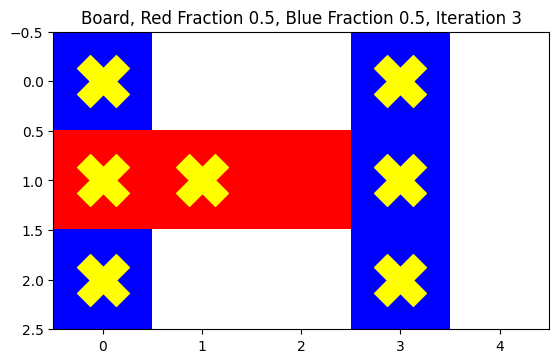

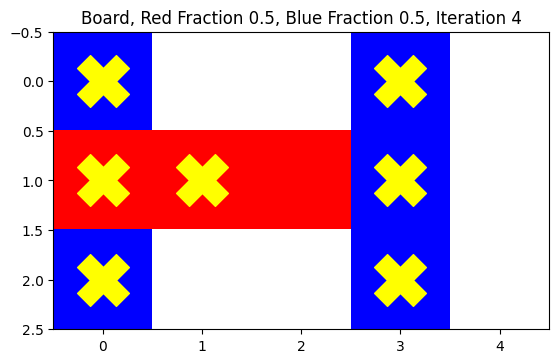

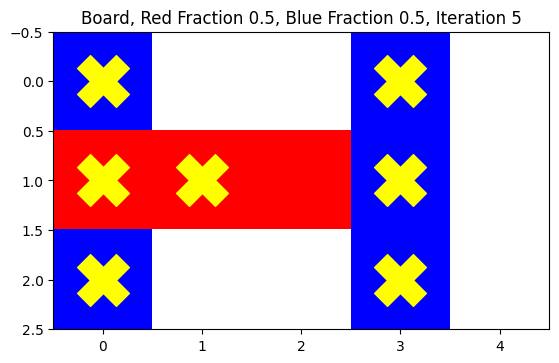

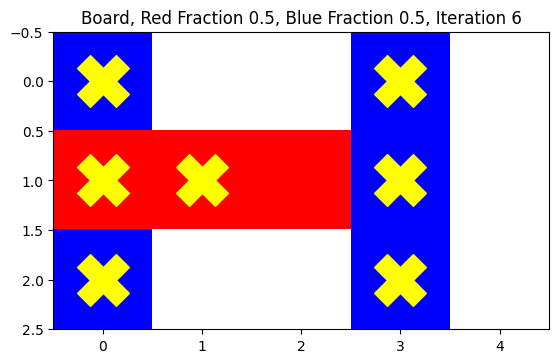

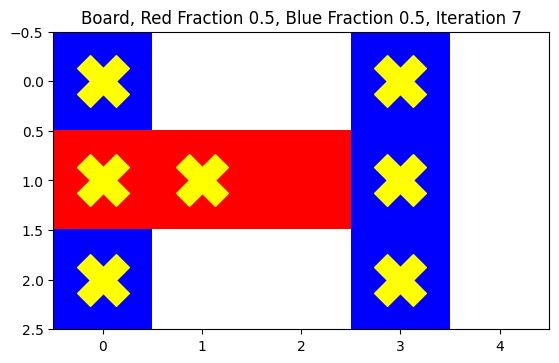

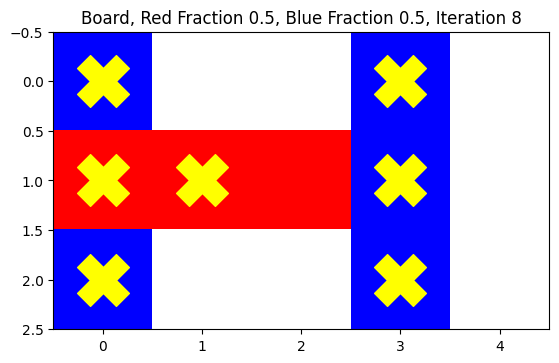

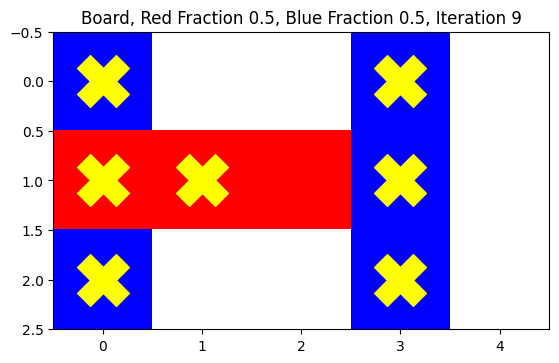

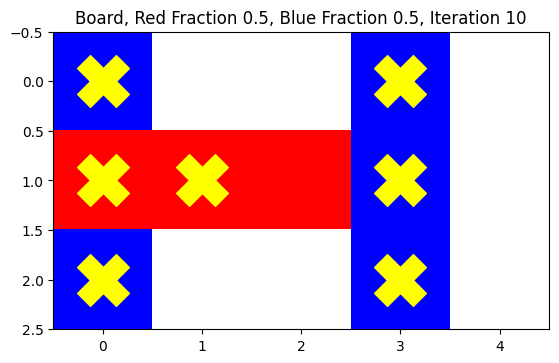

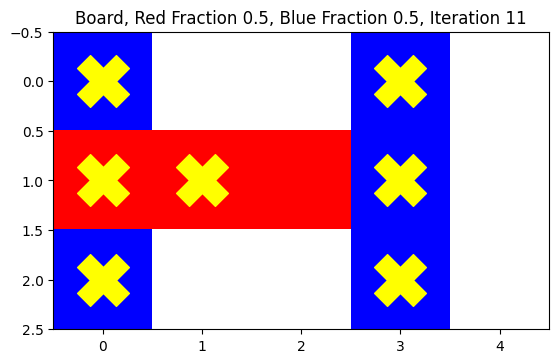

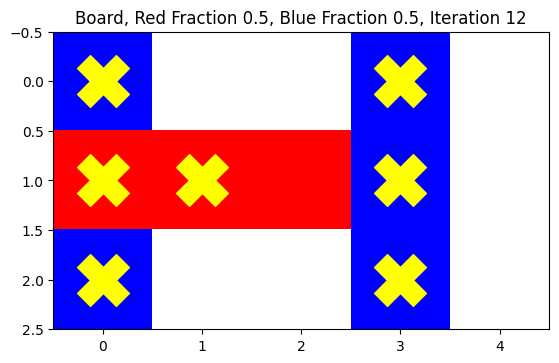

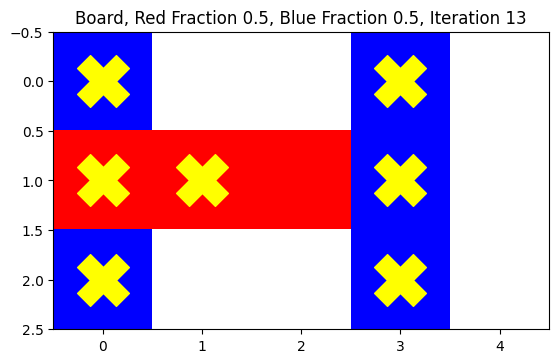

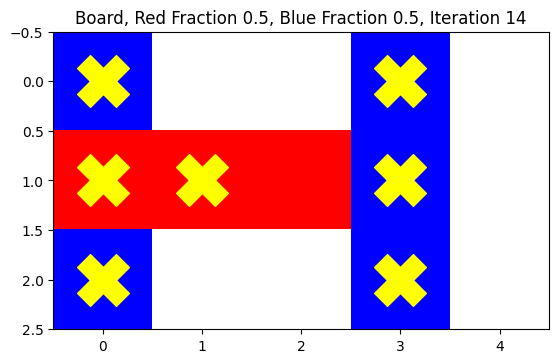

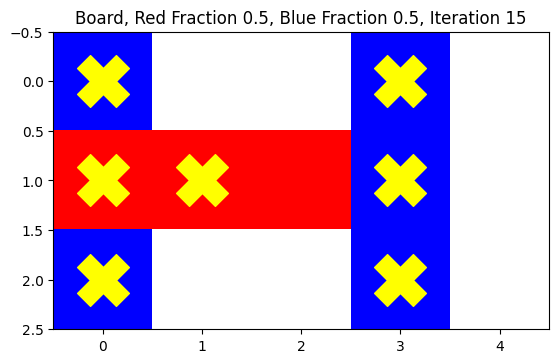

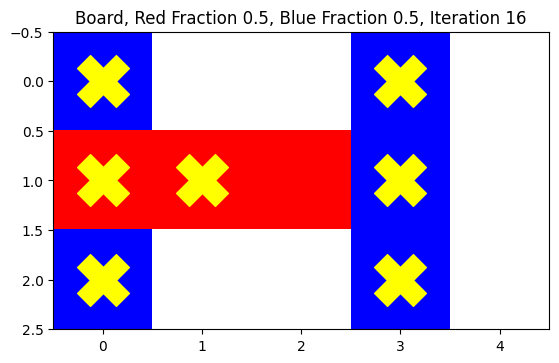

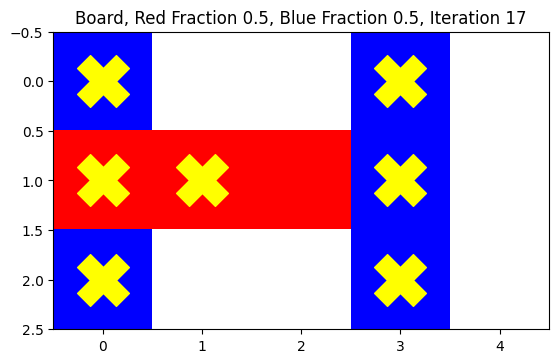

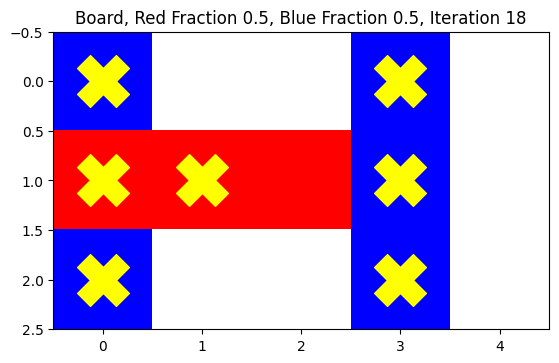

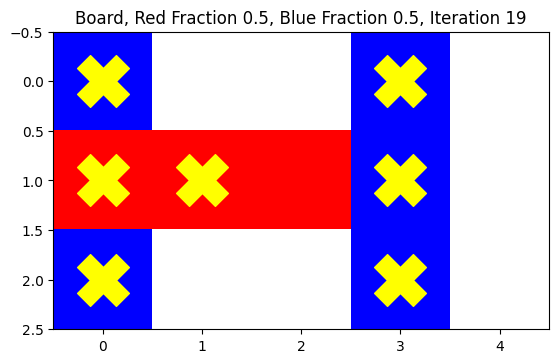

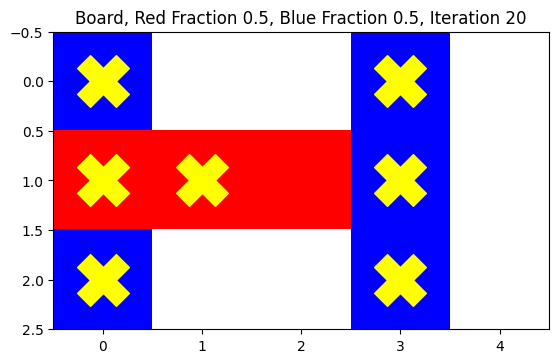

In [ ]:
# Feel free to change the customizable inputs given here.
check_random_case_with_board_size_fraction_density(3, 5, 0.5, 0.5, 0.25, 0.25)